# Sections

* Target Variable Identification
* Data Quality Issues
* Derived Metrics
* Univariate Analysis
* Bivariate Analysis
* Recommendations


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
### read data
df1 = pd.read_csv("loan.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Target Variable

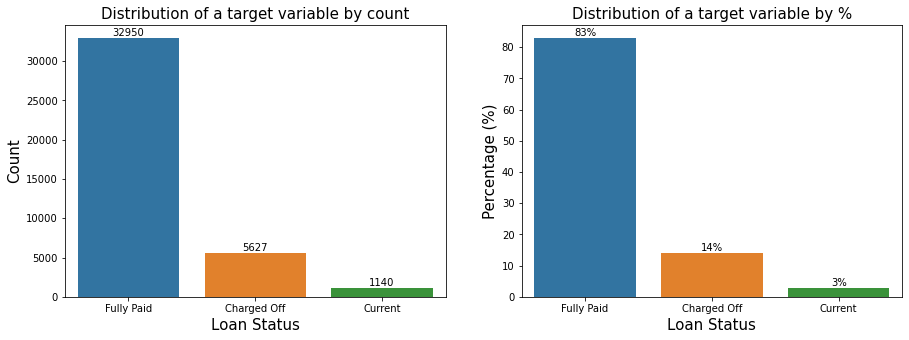

In [3]:
## look at the distribution of the target variable countwise and % wise

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharex=True, sharey=False)

status1 = df1.loan_status.value_counts()
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
axes[0].set_ylabel("Count", fontsize = 15)
axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0])

status2 = df1.loan_status.value_counts().div(len(df1)).mul(100)
sns.barplot(ax=axes[1], x=status2.index, y=status2.values)
axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
axes[1].set_ylabel("Percentage (%)", fontsize = 15)
axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0], fmt='%.f%%')

plt.show()

In [4]:
### drop records with Loan Status "Current" for now as the performance history is not complete and
## it comprises only 3% of data

print(df1.shape)
df2 = df1[(df1.loan_status != "Current")]
print(df2.shape)

(39717, 111)
(38577, 111)


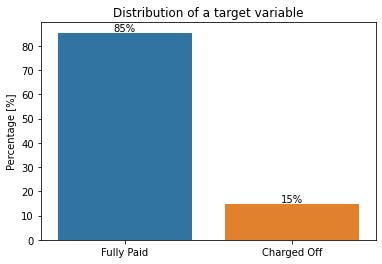

In [5]:
## look at the distribution of the target variable % wise after dropping Current accounts

status = df2.loan_status.value_counts().div(len(df2)).mul(100)
ax = sns.barplot(x=status.index, y=status.values)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Distribution of a target variable")
plt.ylabel("Percentage [%]")
plt.show()


### Transform Categorical Variable into a more intuitive format

In [6]:
# for purpose of analysis it is better to convert the target variable to numeric with
# 1 denoting default/chargeoff and 0 denoting fully paid

df2["default_rate"]= df2.loan_status.apply(lambda x: 0 if x=="Fully Paid" else 1)


In [7]:
# it can be seen that the mean of this variable is same as the overall charge off/default rate for the closed accounts 
df2.default_rate.describe()

count    38577.000000
mean         0.145864
std          0.352975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_rate, dtype: float64

# Data Cleaning

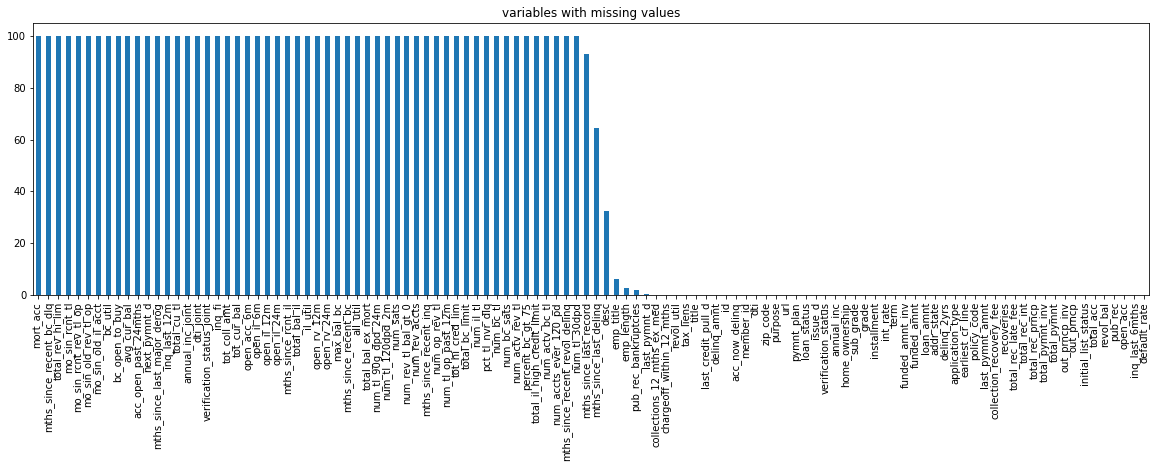

In [8]:
## visualize %missing values for various columns
missing = df2.isna().sum().div(len(df2)).mul(100).sort_values(ascending=False)
plt.figure(figsize=(20,5))
missing.plot.bar().set(title='variables with missing values')
plt.show()

In [9]:
## drop records with 100% null values
df2.dropna(axis=1, how='all',inplace=True)
print(df2.shape)


(38577, 57)


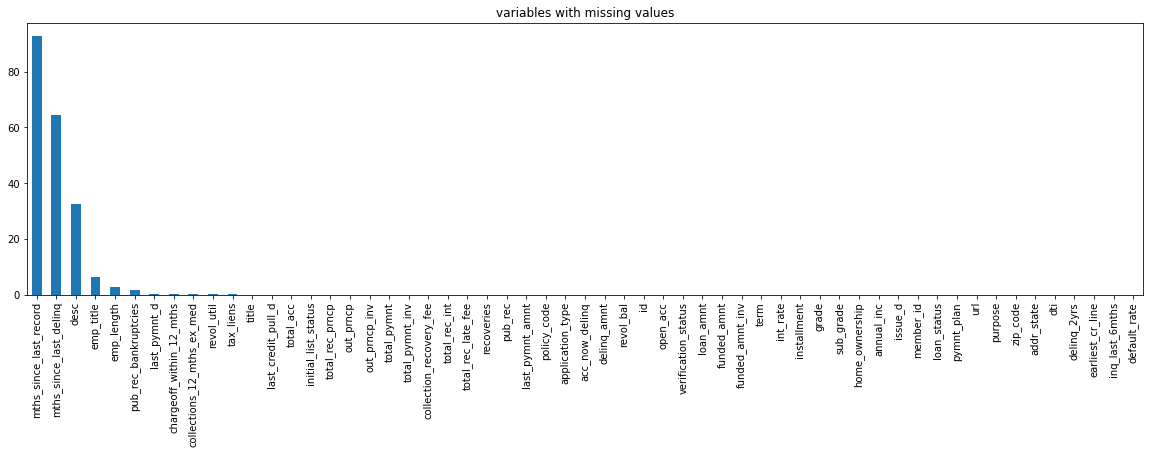

In [10]:
## 57 columns are left after dropping columns with 100% missing value
## visualize %missing values for the remaining columns
missing = df2.isna().sum().div(len(df2)).mul(100).sort_values(ascending=False)
plt.figure(figsize=(20,5))
missing.plot.bar().set(title='variables with missing values')
plt.show()

In [11]:
## look at the 13 columns which still have missing values
missing=df2.isna().sum().div(len(df2)).mul(100).sort_values(ascending=False)
print(missing)


mths_since_last_record        92.897322
mths_since_last_delinq        64.559193
desc                          32.472717
emp_title                      6.185033
emp_length                     2.677761
pub_rec_bankruptcies           1.806776
last_pymnt_d                   0.184047
chargeoff_within_12_mths       0.145164
collections_12_mths_ex_med     0.145164
revol_util                     0.129611
tax_liens                      0.101097
title                          0.028514
last_credit_pull_d             0.005184
total_acc                      0.000000
initial_list_status            0.000000
total_rec_prncp                0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000


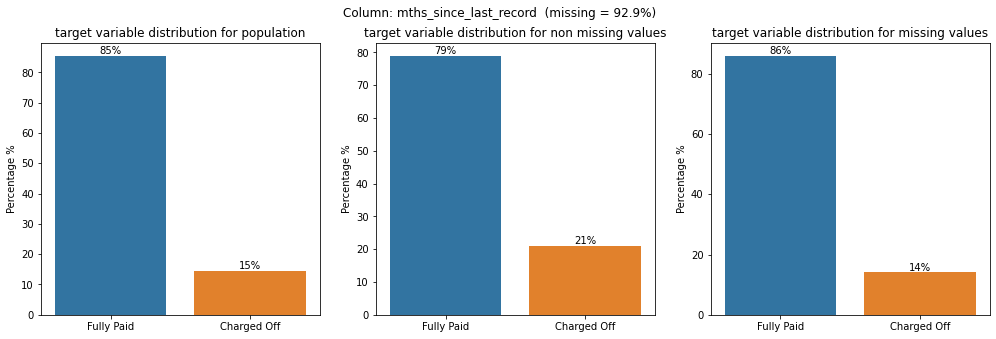

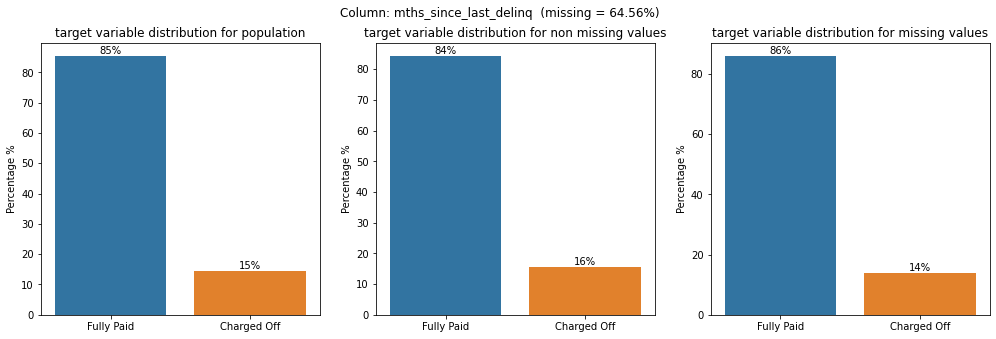

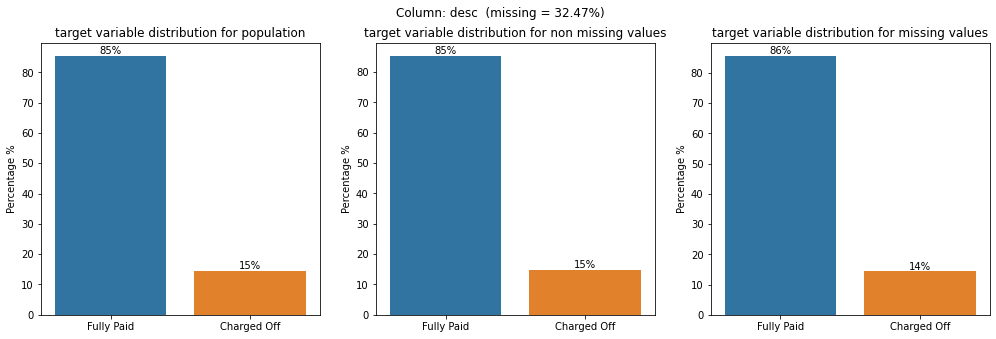

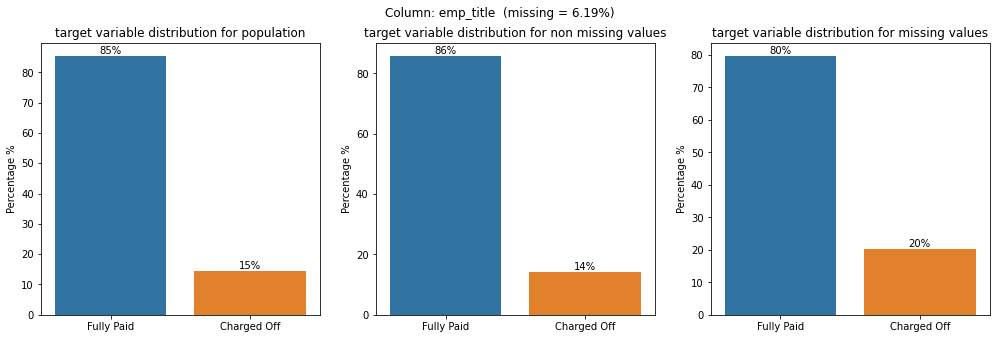

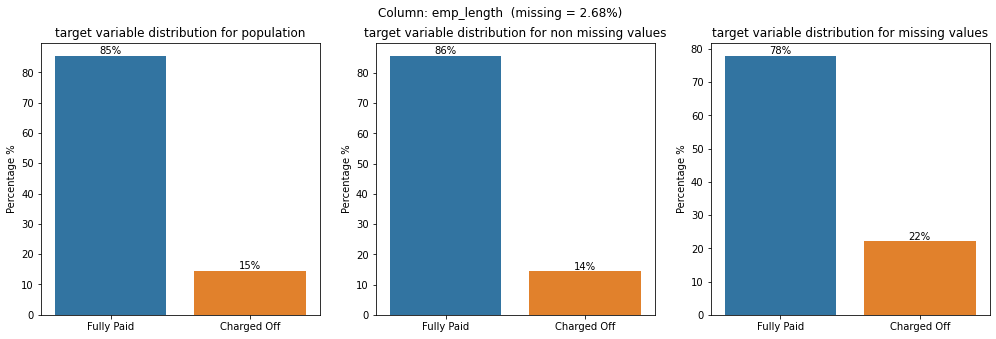

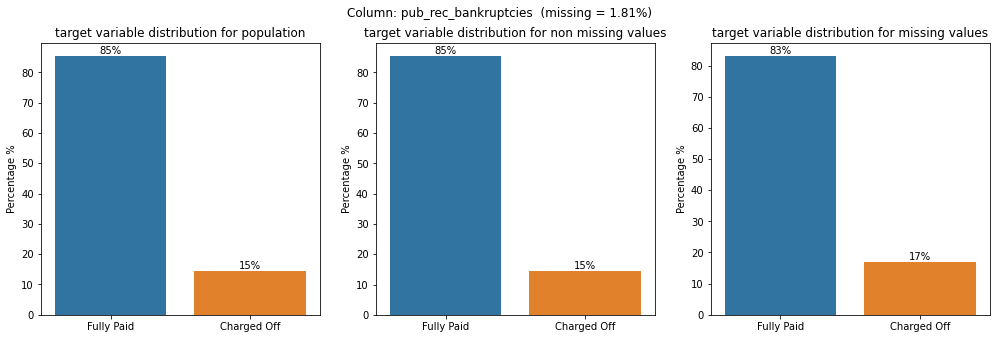

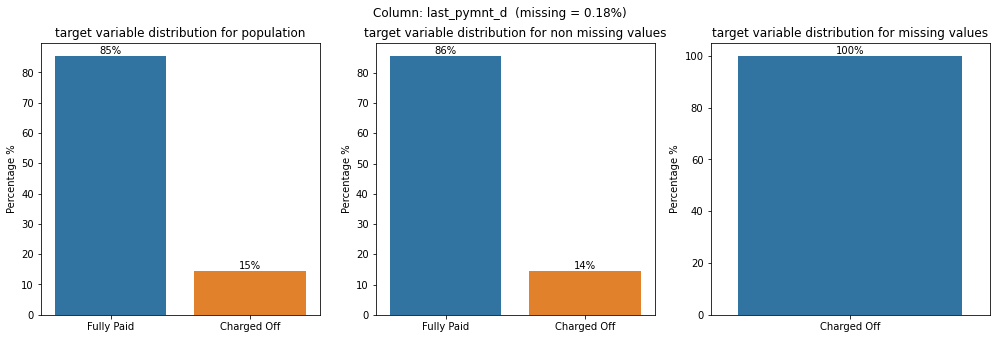

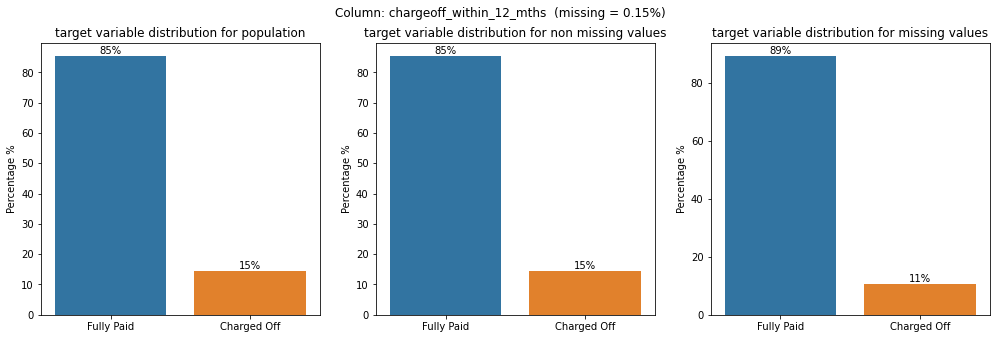

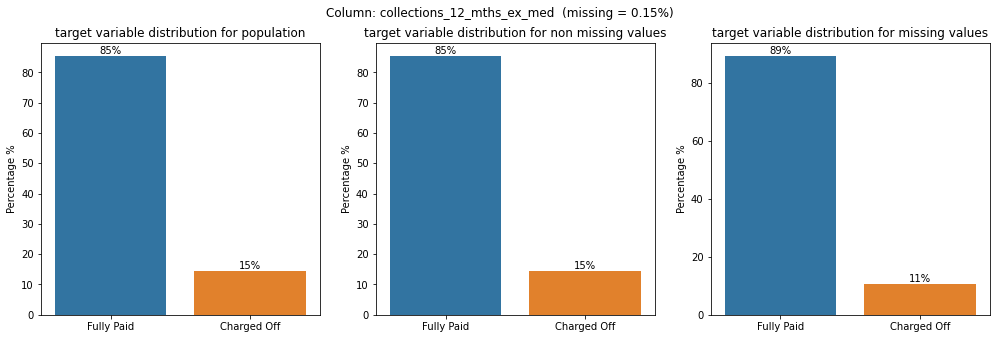

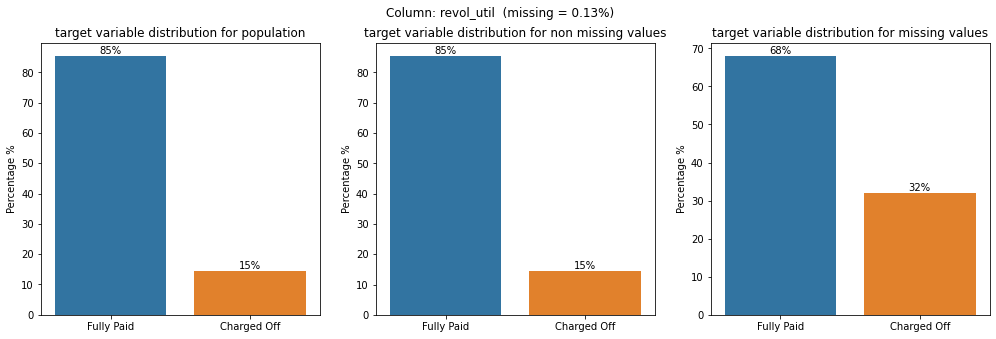

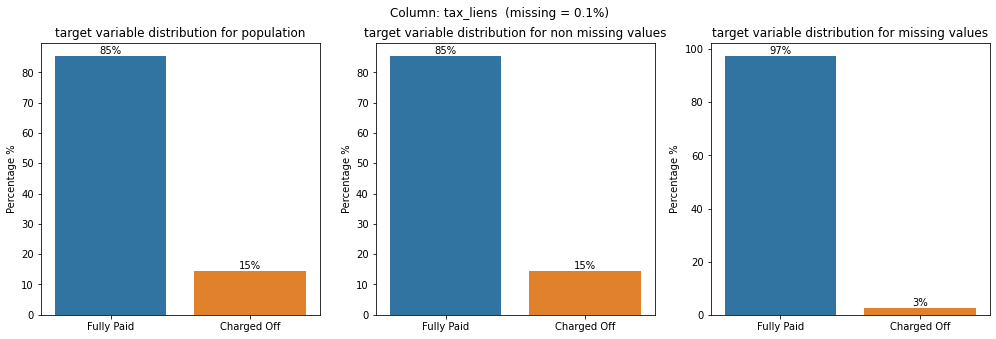

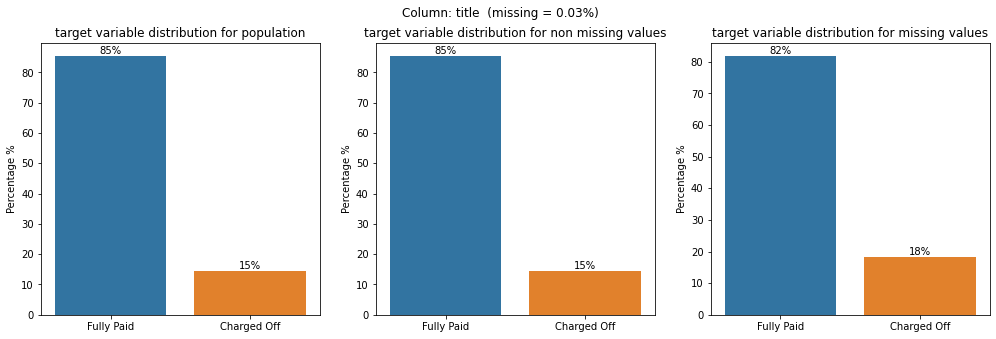

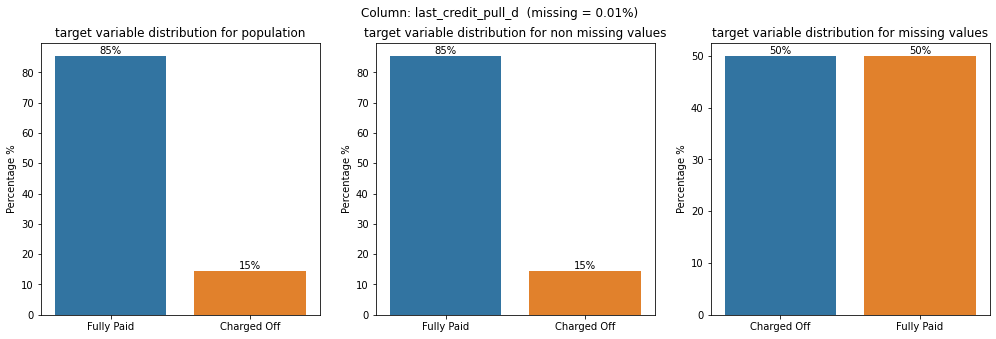

In [12]:
## for the 13 remaining variables with missing values we look at the distribution of target variables for missing and 
## non missing parts of the data to see if there are any major difference
## also displayed is the % of missing value for each column

for x in list(missing.index[0:13]):
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(17, 5))
    temp0 = df2.loan_status.value_counts().div(len(df2)).mul(100)
    sns.barplot(ax=axes[0], x=temp0.index, y=temp0.values)
    axes[0].set_title("target variable distribution for population")
    axes[0].set_ylabel("Percentage %")
    axes[0].bar_label(axes[0].containers[0], fmt='%.f%%')

    temp1 = df2[~(df2[x].isna())].loan_status.value_counts().div(len(df2[~(df2[x].isna())])).mul(100)
    sns.barplot(ax=axes[1], x=temp1.index, y=temp1.values)
    axes[1].set_title("target variable distribution for non missing values")
    axes[1].set_ylabel("Percentage %")
    axes[1].bar_label(axes[1].containers[0], fmt='%.f%%')

    temp2 = df2[(df2[x].isna())].loan_status.value_counts().div(len(df2[(df2[x].isna())])).mul(100)
    sns.barplot(ax=axes[2], x=temp2.index, y=temp2.values)
    axes[2].set_title("target variable distribution for missing values")
    axes[2].set_ylabel("Percentage %")
    axes[2].bar_label(axes[2].containers[0], fmt='%.f%%')

    fig.suptitle("Column: "+ str(str(x) + "  (missing = "+ str(round(missing[x],2))+"%)"))
    plt.show()


In [13]:
## drop 'mths_since_last_record' as it has 90%+ missing values, rest of the variables  will be further assessed
print(df2.shape)
df2.drop(['mths_since_last_record'], axis=1, inplace=True)
print(df2.shape)

(38577, 57)
(38577, 56)


In [14]:
## check unique values for each of the variable
df2.nunique(axis=0).sort_values(ascending=True)


collections_12_mths_ex_med        1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
pymnt_plan                        1
policy_code                       1
tax_liens                         1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
application_type                  1
term                              2
loan_status                       2
default_rate                      2
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                   

In [15]:
## given 'id' and 'member_id' have all unique values no aggregation is required and each record is for a single account
## for the purpose of our analysis we do not need both so  will drop "member_id"
## additionally url column also does not have any useful information so will be dropped
print(df2.shape)
df2.drop(['member_id','url'], axis=1, inplace=True)
print(df2.shape)

(38577, 56)
(38577, 54)


In [16]:
# drop the 11 variables with only 1 unique value since they don't add any value
nounique = list(df2.nunique(axis=0).sort_values(ascending=True).index[0:11])
print(df2.shape)
df2.drop(nounique, axis=1, inplace=True)
print(df2.shape)

(38577, 54)
(38577, 43)


In [17]:
## list down the remaining columns
df2.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'default_rate'],
      dtype='object')

In [18]:
## look at variables of object type to see which ones need to be converted to a suitable format
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  object 
 5   int_rate                 38577 non-null  object 
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_title                36191 non-null  object 
 10  emp_length               37544 non-null  object 
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d               

In [19]:
df2.term.value_counts()
## term is a categorical value having only 2 values of 3 years and 5 years so no correction needed

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [20]:
# convert interest rate variable to float type
df2.int_rate=df2.int_rate.apply(lambda x: float(x[:].replace("%",""))/100)

In [21]:
# grade is a categorical varaible so no correction needed
df2.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [22]:
# sub_grade is a categorical varaible so no correction needed
df2.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [23]:
#Employer Title / Name is a free form field so not very usable without resorting to extensive data cleaning
# for example there are multiple variations for US Army with different spellings (US Army,U.S. Army, US ARMY, us army)

employer = df2[["emp_title","default_rate"]].groupby("emp_title").mean().sort_values(ascending=False,by=["default_rate"])
employer

,default_rate
emp_title,
zozaya officiating,1.0
Tree of Knowledge Educational Services Inc.,1.0
Trapper Mining Inc.,1.0
Travel Retail Concepts,1.0
EBS Healthcare,1.0
...,...
Heritage Healthcare of Macon,0.0
Heritage Healthcare at High Point,0.0
Heritage Environmental Services,0.0


In [24]:
temp=pd.pivot_table(df2,
    index=["emp_title"],
    values=["default_rate","loan_amnt"],
    aggfunc={"default_rate":'mean',"loan_amnt":'size'})
temp.rename(columns = {'loan_amnt':'Number_of_Loans'}, inplace = True)
temp.sort_values(ascending=False,by=["Number_of_Loans","default_rate"],inplace=True)
temp.head(30)

,default_rate,Number_of_Loans
emp_title,,
US Army,0.137405,131
Bank of America,0.186916,107
IBM,0.138462,65
AT&T,0.210526,57
Kaiser Permanente,0.142857,56
UPS,0.230769,52
Wells Fargo,0.076923,52
USAF,0.038462,52
US Air Force,0.117647,51


In [25]:
#while there is some usable information in employer field however given time constraints will drop this variable
df2.drop(['emp_title'], axis=1, inplace=True)

In [26]:
#Employment Length is a categorical variable so no cleaning required
df2.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [27]:
# home ownership status value is a categorical value and does not seem to have any data quality issues
df2.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [28]:
# verification status value is a categorical value and does not seem to have any data quality issues
df2.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [29]:
# Loan description seems to be a free form field so not very usable without resorting to text mining
# as a result decided to drop this variable

#df2.desc.value_counts()

print(df2.shape)
df2.drop(['desc'], axis=1, inplace=True)
print(df2.shape)

(38577, 42)
(38577, 41)


In [30]:
# purpose coulmn is a categorical value and does not seem to have any data quality issues
df2.purpose.value_counts()


debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [31]:
# Title seems to be a free form field so not very usable without resorting to text mining
# as a result decided to drop this variable
print(df2.shape)
df2.drop(['title'], axis=1, inplace=True)
print(df2.shape)

(38577, 41)
(38577, 40)


In [32]:
# zip code is categorical value with 822 levels and does not seem to have any data quality issues
df2.zip_code.unique().size

822

In [33]:
#while there is some usable information in zip_code however given time constraints will drop this variable
df2.drop(['zip_code'], axis=1, inplace=True)

In [34]:
# state is a categorical value with 50 levels and does not seem to have any data quality issues
df2.addr_state.unique().size
df2.addr_state.value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [35]:
# revolver utilization needs to be converted to float
# it can be seen that there are 50 missing/blank values
df2.revol_util.info()

<class 'pandas.core.series.Series'>
Int64Index: 38577 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype 
--------------  ----- 
38527 non-null  object
dtypes: object(1)
memory usage: 602.8+ KB


In [36]:
# convert revolver utilization to float
# missing values are retained for future use
df2.revol_util=df2.revol_util.apply(lambda x: float(str(x)[:].replace("%",""))/100)

In [37]:
df2.last_pymnt_d.head()

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
5    Jan-15
Name: last_pymnt_d, dtype: object

In [38]:
# it can be seen that the variables "recoveries", and, "collection_recovery_fee" are only applicable to defaults
# based on business logic these variables are post default indicators and hence are not relevant to the problem statement
# the problem statement is to identify indicators of default so will drop these 2 variables

#we can see below the total sum of "recoveries", and, "collection_recovery_fee" across default and non default records
temp=pd.pivot_table(df2,
    index=["default_rate"],
    values=["recoveries","collection_recovery_fee","id"],
    aggfunc={"recoveries":'sum',"collection_recovery_fee":'sum',"id":'size'})

temp["id"] = temp["id"].div(len(df2))
temp.rename(columns = {'id':'Total Loans %'}, inplace = True)

#print(temp)

output = temp.to_string(formatters={

"collection_recovery_fee": '{:.2f}'.format,
"recoveries": '{:.2f}'.format,
"Total Loans %": '{:.2%}'.format
})
print(output)

             collection_recovery_fee Total Loans % recoveries
default_rate                                                 
0                               0.00        85.41%       0.00
1                          492733.55        14.59% 3781917.24


In [39]:
# it can be seen that the variables "recoveries", and, "collection_recovery_fee" are only applicable to defaults
# based on business logic these variables are post default indicators and hence are not relevant to the problem statement
# the problem statement is to identify indicators of default so will drop these 2 variables

print(df2.shape)
df2.drop(["recoveries","collection_recovery_fee"], axis=1, inplace=True)
print(df2.shape)

(38577, 39)
(38577, 37)


In [40]:
#drop loan_status as no longer required
df2.drop(['loan_status'], axis=1, inplace=True)

In [41]:
# the following columns are only available once the loan is closed out either due to default or repayment
# as a result they do not have much predictive power 

behavioral_var = ['total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','last_pymnt_d', 
 'last_pymnt_amnt', "last_credit_pull_d"]
print(df2.shape)
df2.drop(behavioral_var, axis=1, inplace=True)
print(df2.shape)



(38577, 36)
(38577, 28)


In [42]:
print("correlation between funded amount and funded amount by investor = ",df2.funded_amnt.corr(df2.funded_amnt_inv))
df2["inv_ratio"] = df2.funded_amnt_inv / df2.funded_amnt
print("\n")
print("summary stats for ratio of funded amount and funded amount by investor")
print(df2["inv_ratio"].describe())
print("\n")
print("default rate for loans wher investor ratio <1   :",df2[(df2["inv_ratio"]<1)].default_rate.mean())
print("default rate for loans wher investor ratio >=1  :",df2[(df2["inv_ratio"]>=1)].default_rate.mean())

correlation between funded amount and funded amount by investor =  0.9561716504513705


summary stats for ratio of funded amount and funded amount by investor
count    38577.000000
mean         0.949869
std          0.161713
min          0.000000
25%          0.986156
50%          1.000000
75%          1.000000
max          1.000000
Name: inv_ratio, dtype: float64


default rate for loans wher investor ratio <1   : 0.14908996359854393
default rate for loans wher investor ratio >=1  : 0.14265777639944177


In [43]:
#as seen above not much difference between funded amount and funded amount by investor
# as a result dropping "funded_amnt_inv"

print(df2.shape)
df2.drop(["funded_amnt_inv"], axis=1, inplace=True)
df2.drop(["inv_ratio"], axis=1, inplace=True)
print(df2.shape)

(38577, 29)
(38577, 27)


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   loan_amnt               38577 non-null  int64  
 2   funded_amnt             38577 non-null  int64  
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  float64
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              37544 non-null  object 
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  issue_d                 38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  addr_state              38577 non-null

In [45]:
# convert all date cols to datetime format and extract year and month

time_cols = ["issue_d","earliest_cr_line"]

for x in time_cols:
    df2[x] = pd.to_datetime(df2[x],format="%b-%y")
    df2[x + "_month"]=pd.DatetimeIndex(df2[x]).month
    df2[x + "_year"]=pd.DatetimeIndex(df2[x]).year

# Derived Metrics

In [46]:
# create a new variable for length of credit history based on the difference of earliest credit line and issue date
df2["length_credit_history"] = (df2.issue_d-df2.earliest_cr_line)/np.timedelta64(1, 'Y')
df2.length_credit_history.describe()



count    38577.000000
mean        13.501972
std          7.390395
min        -60.001232
25%          8.999500
50%         12.495808
75%         16.917527
max         42.752418
Name: length_credit_history, dtype: float64

In [47]:
#look at records with -ve credit history
df2[df2["length_credit_history"]<0][["issue_d","earliest_cr_line"]].head()

,issue_d,earliest_cr_line
1576,2011-12-01,2062-09-01
1764,2011-12-01,2068-09-01
3274,2011-11-01,2067-09-01
3349,2011-11-01,2065-02-01
3403,2011-11-01,2067-06-01


In [48]:
# there are 85 records with earliest credit line after issue date
# as can be seen there are issues with the field earliest credit line
df2[df2["length_credit_history"]<0].shape

(85, 32)

In [49]:
# since its only 85 records will drop these records with negative credit history
print(df2.shape)
df2=df2[df2["length_credit_history"]>=0]
print(df2.shape)

(38577, 32)
(38492, 32)


#### transform level variables to relative values for better usability

In [50]:
df2["loan_amnt%"] = df2["loan_amnt"]/df2["annual_inc"]
df2["loan_amnt%"].describe()

count    38492.000000
mean         0.185865
std          0.115252
min          0.000789
25%          0.098039
50%          0.162963
75%          0.250000
max          0.830000
Name: loan_amnt%, dtype: float64

In [51]:
# funded 
df2["funded_amnt%"] = df2["funded_amnt"]/df2["loan_amnt"]
df2["funded_amnt%"].describe()

count    38492.000000
mean         0.985942
std          0.069633
min          0.101250
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: funded_amnt%, dtype: float64

In [52]:
df2["installment%"] = df2["installment"] / df2["annual_inc"]
df2["installment%"].describe()

count    38492.000000
mean         0.005470
std          0.003338
min          0.000024
25%          0.002920
50%          0.004807
75%          0.007349
max          0.026689
Name: installment%, dtype: float64

In [53]:
df2["revol_bal%"] = df2["revol_bal"] / df2["annual_inc"]
df2["revol_bal%"].describe()

count    38492.000000
mean         0.201987
std          0.187315
min          0.000000
25%          0.068914
50%          0.156534
75%          0.280755
max          3.116475
Name: revol_bal%, dtype: float64

In [54]:
# remove the level variables which have already been transformed
level_var = ['loan_amnt', 'funded_amnt','installment', 'revol_bal']
df2.drop(level_var, axis=1, inplace=True)

In [55]:
df2.columns

Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'default_rate',
       'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'length_credit_history', 'loan_amnt%',
       'funded_amnt%', 'installment%', 'revol_bal%'],
      dtype='object')

In [56]:
df2.pub_rec_bankruptcies.value_counts()

0.0    36163
1.0     1629
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [57]:
# for the 5 records with 2 pub_rec_bankruptcies will impute them to 1
# this would decrease the levels of this variable and make it more informative 

df2.loc[df2["pub_rec_bankruptcies"] == 2.0, "pub_rec_bankruptcies"] = 1.0
df2.pub_rec_bankruptcies.value_counts()

0.0    36163
1.0     1634
Name: pub_rec_bankruptcies, dtype: int64

In [58]:
df2.pub_rec.value_counts()

0    36431
1     2005
2       47
3        7
4        2
Name: pub_rec, dtype: int64

In [59]:
# given the low number of records with more than 1 Number of derogatory public records, will change them to 1
# this would decrease the levels of this variable and make it more informative
df2.loc[df2["pub_rec"] > 0, "pub_rec"] = 1
df2.pub_rec.value_counts()

0    36431
1     2061
Name: pub_rec, dtype: int64

# Univariate Analysis

In [60]:
#variables are segregated by type

#list of categorical variables
# this includes variables like 'open_acc',"delinq_2yrs","inq_last_6mths" which though numeric are better represented as 
# ordered categorical variables for this analysis
categorical = ["emp_length","term","grade","sub_grade","emp_length","home_ownership","verification_status",
               "purpose","addr_state","pub_rec","pub_rec_bankruptcies",
               'issue_d_month', 'issue_d_year',
               'open_acc',"delinq_2yrs","inq_last_6mths",
              'earliest_cr_line_month','earliest_cr_line_year']

#list of numeric variables
numeric = ['int_rate', 'annual_inc', 'dti',  'revol_util', 'total_acc',
               'length_credit_history', 'loan_amnt%','installment%', 'revol_bal%']


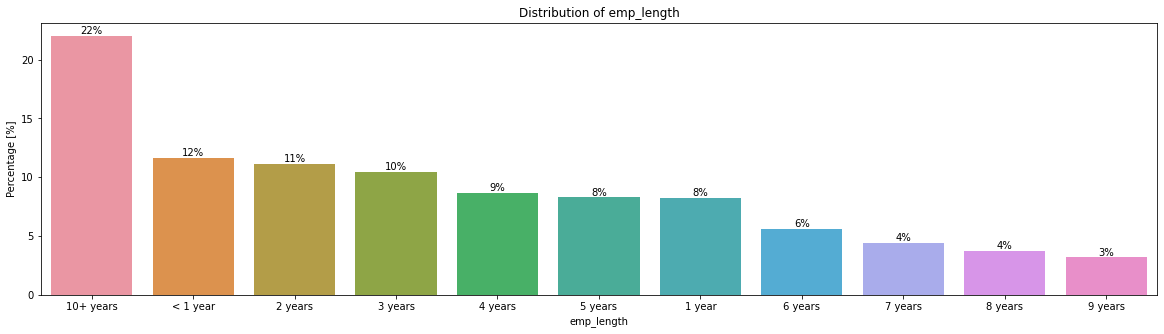

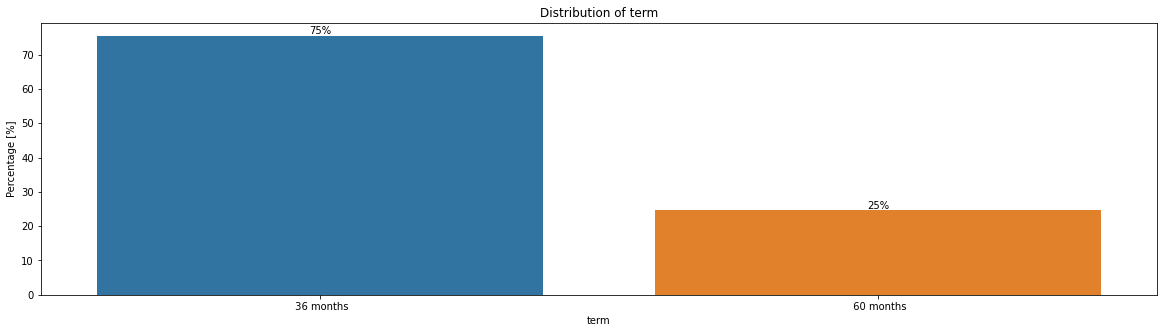

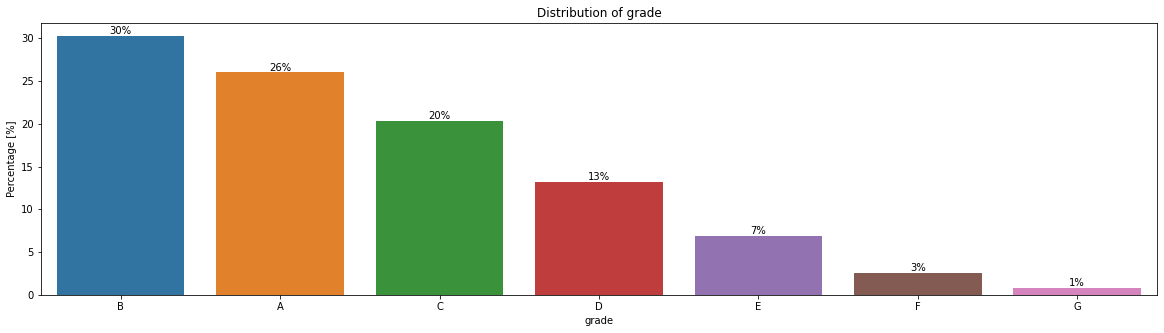

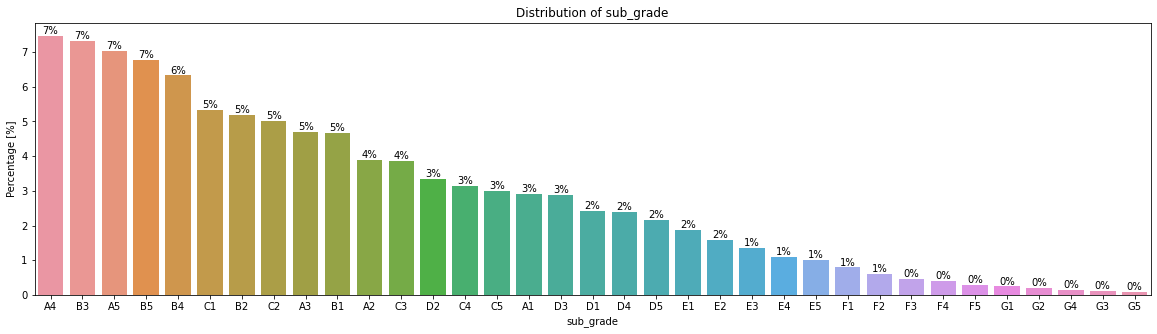

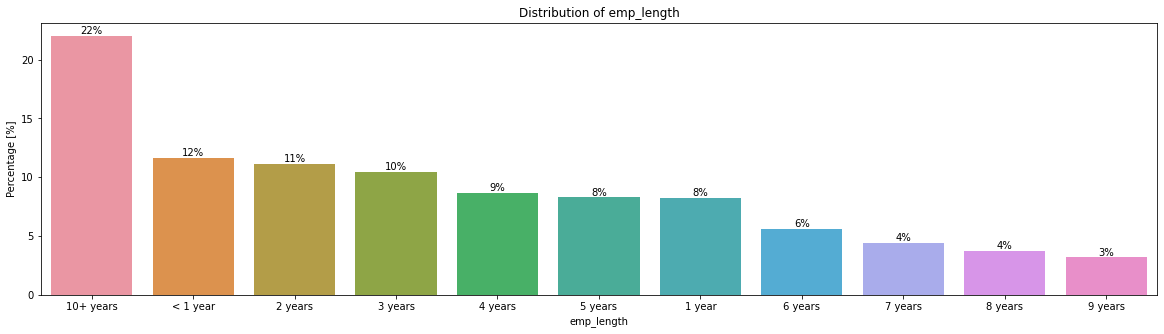

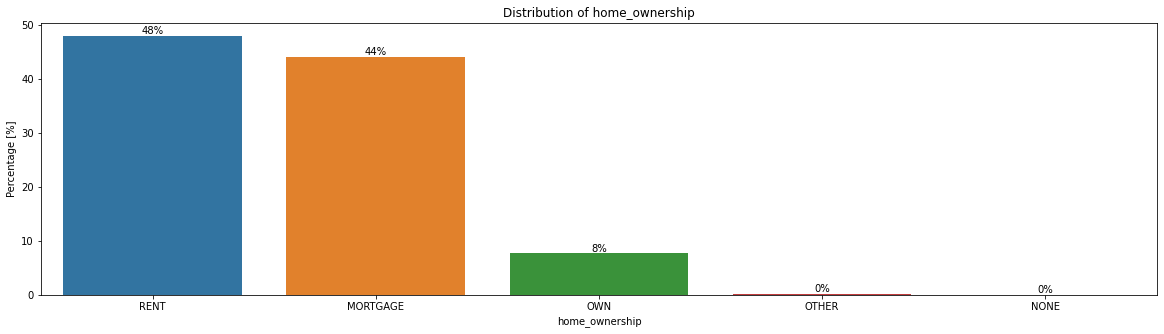

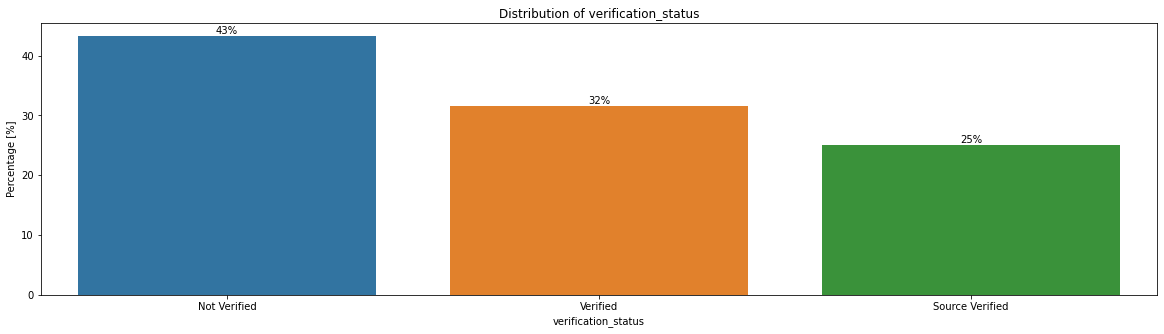

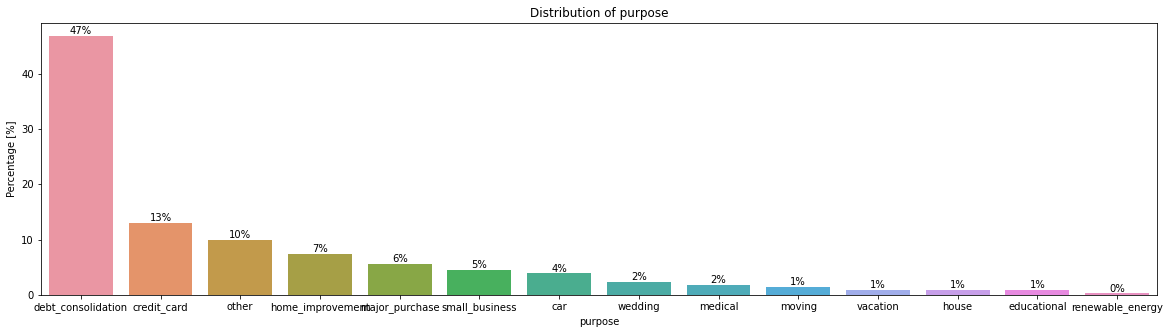

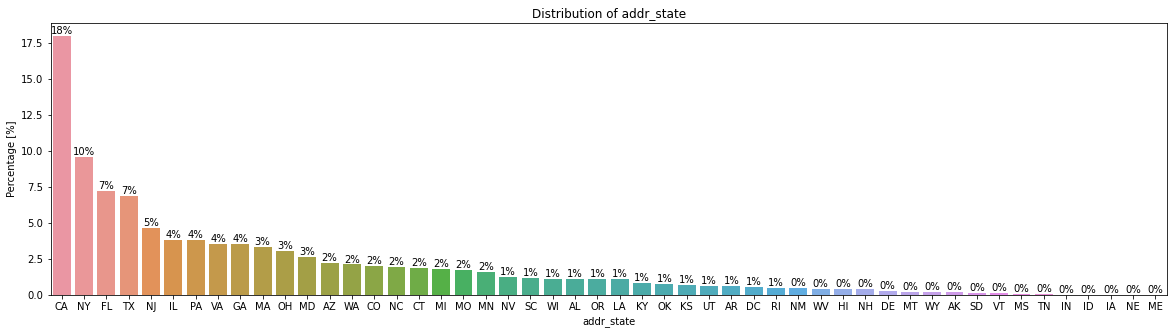

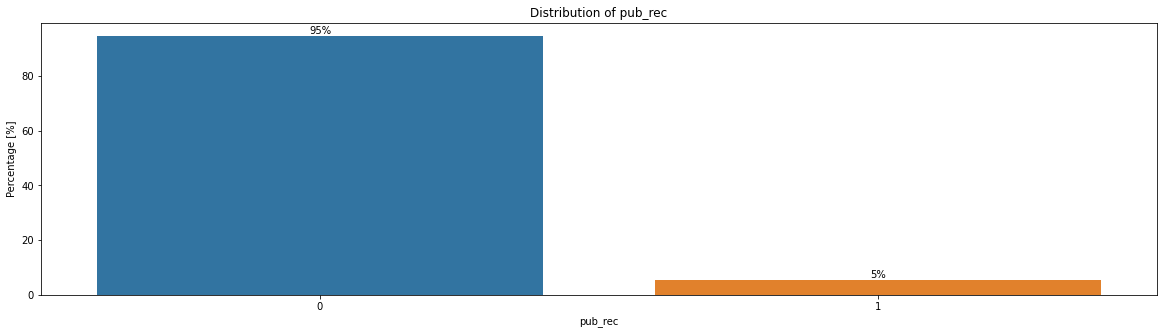

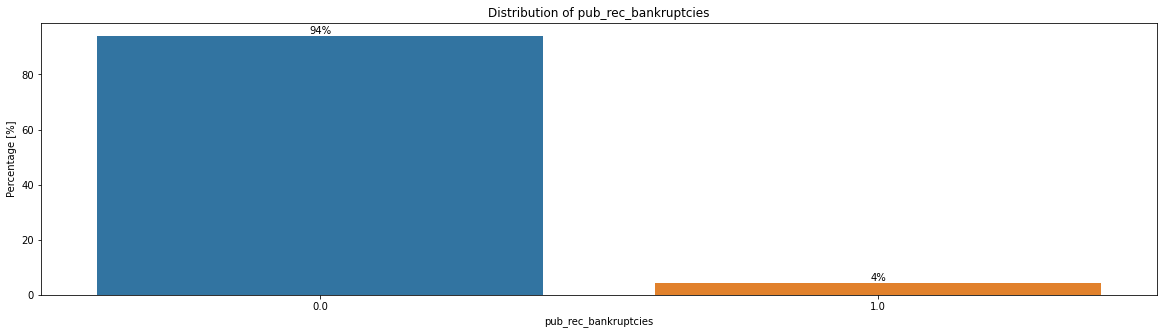

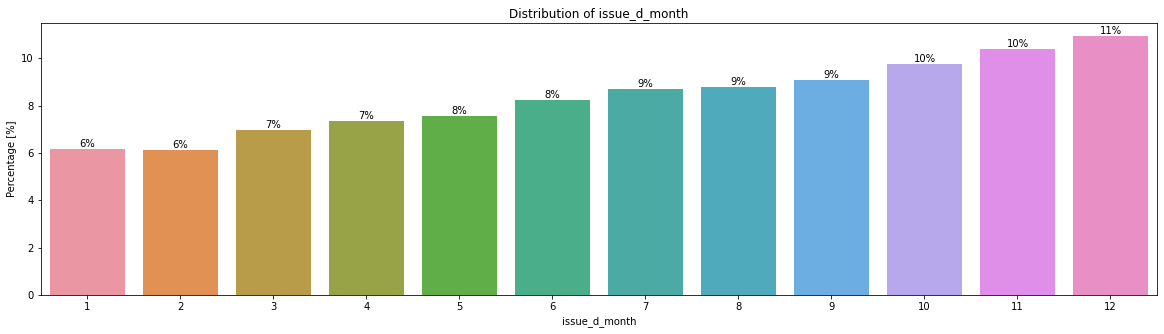

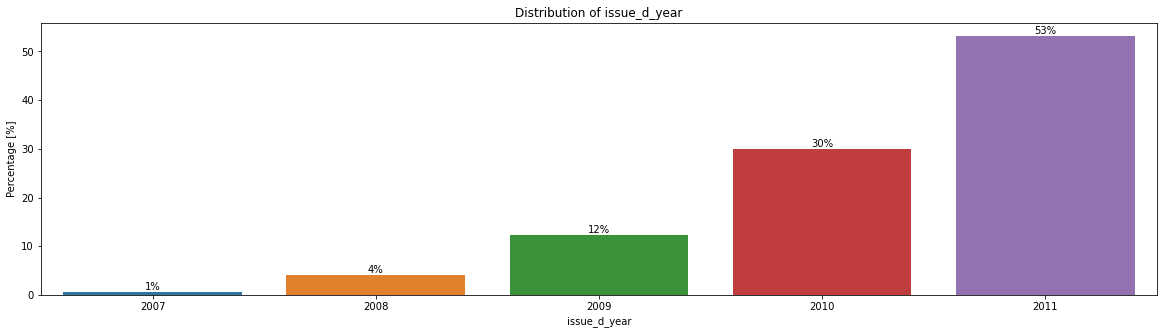

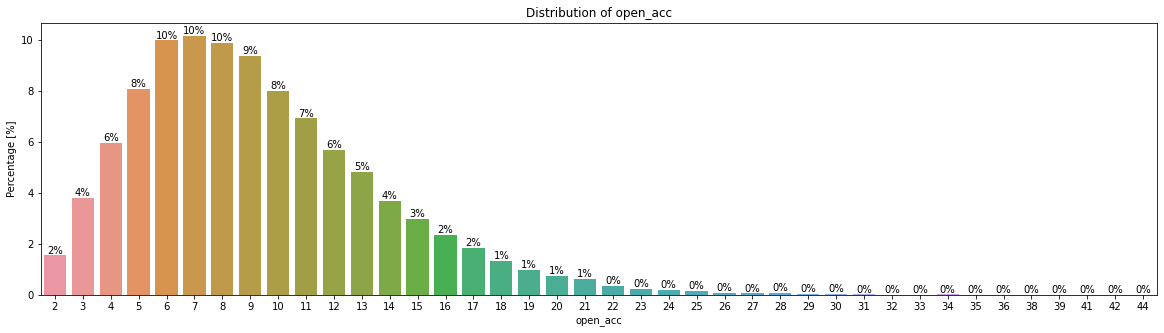

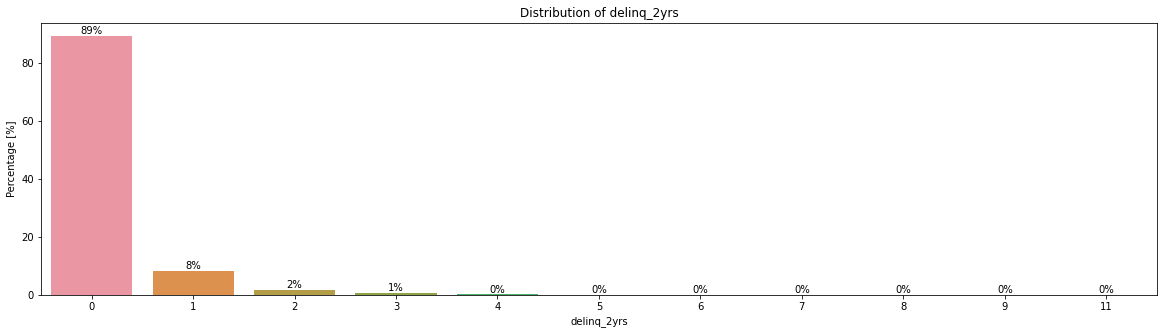

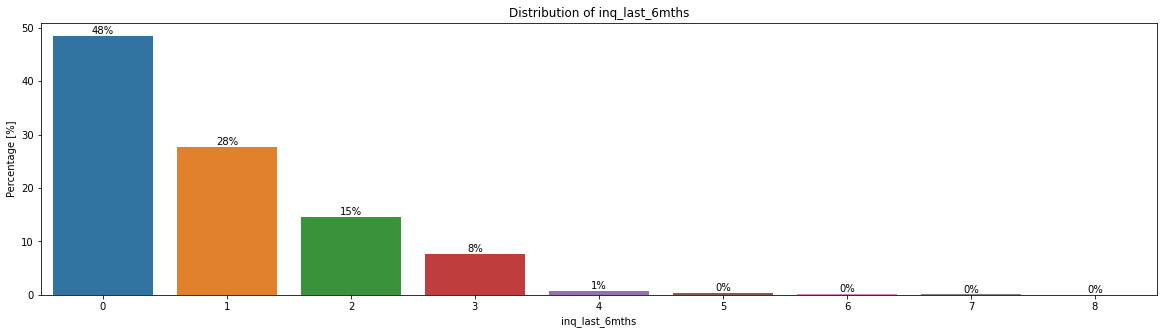

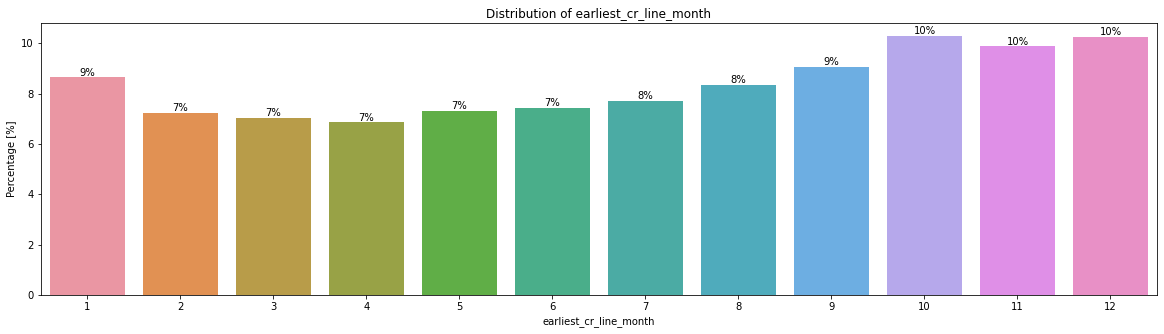

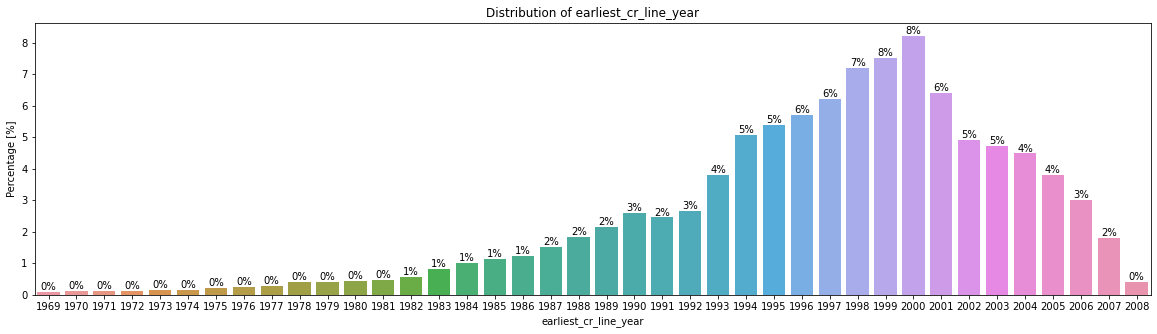

In [61]:
# Bar plots are plotted for all the categorical variables to visualize
for x in categorical:
    status = df2[x].value_counts().div(len(df2)).mul(100)
    plt.figure(figsize=(20,5))
    ax = sns.barplot(x=status.index, y=status.values)
    ax.bar_label(ax.containers[0], fmt='%.f%%')
    plt.title("Distribution of "+x)
    plt.ylabel("Percentage [%]")
    plt.xlabel(x)
    plt.show()    

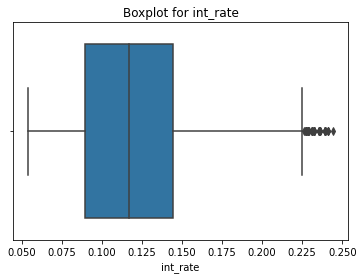

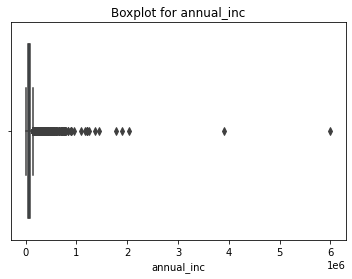

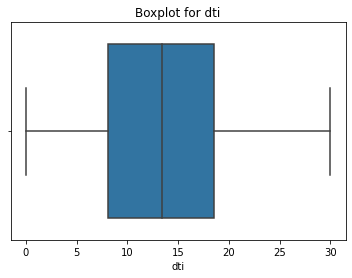

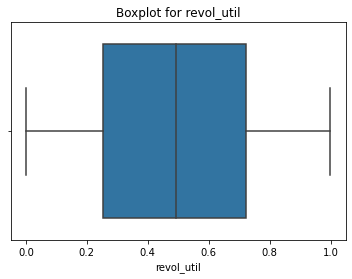

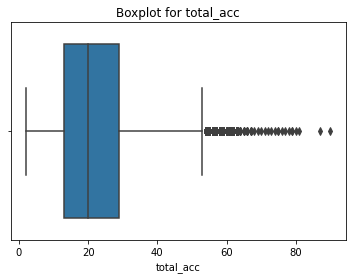

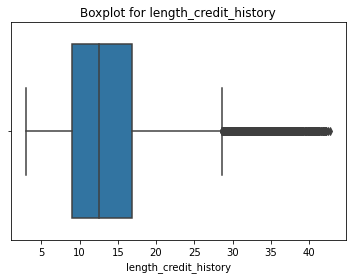

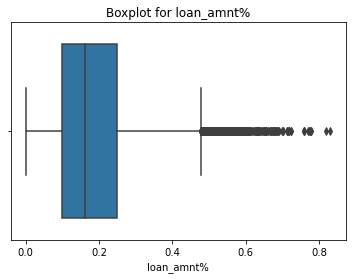

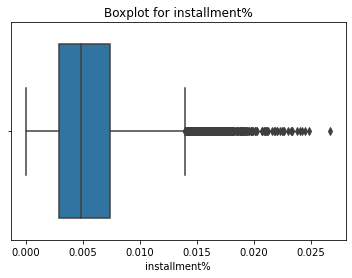

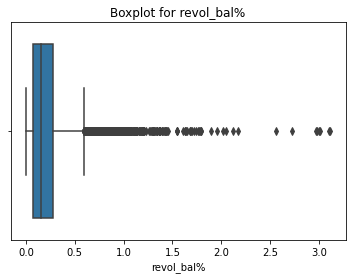

In [62]:
# box plot for numeric variables
for x in numeric:
    sns.boxplot(df2[x])
    plt.title("Boxplot for "+x)
    plt.show() 

In [63]:
# summary statistics for continuous variables
for x in numeric:
    print(df2[x].describe().apply("{0:.2f}".format))
    print("\n")

count    38492.00
mean         0.12
std          0.04
min          0.05
25%          0.09
50%          0.12
75%          0.14
max          0.24
Name: int_rate, dtype: object


count      38492.00
mean       68759.26
std        64234.61
min         4000.00
25%        40000.00
50%        58800.00
75%        82000.00
max      6000000.00
Name: annual_inc, dtype: object


count    38492.00
mean        13.27
std          6.67
min          0.00
25%          8.13
50%         13.37
75%         18.55
max         29.99
Name: dti, dtype: object


count    38442.00
mean         0.49
std          0.28
min          0.00
25%          0.25
50%          0.49
75%          0.72
max          1.00
Name: revol_util, dtype: object


count    38492.00
mean        22.04
std         11.42
min          2.00
25%         13.00
50%         20.00
75%         29.00
max         90.00
Name: total_acc, dtype: object


count    38492.00
mean        13.65
std          6.67
min          3.00
25%          9.08
50%         12

# Segmented Univariate Analysis

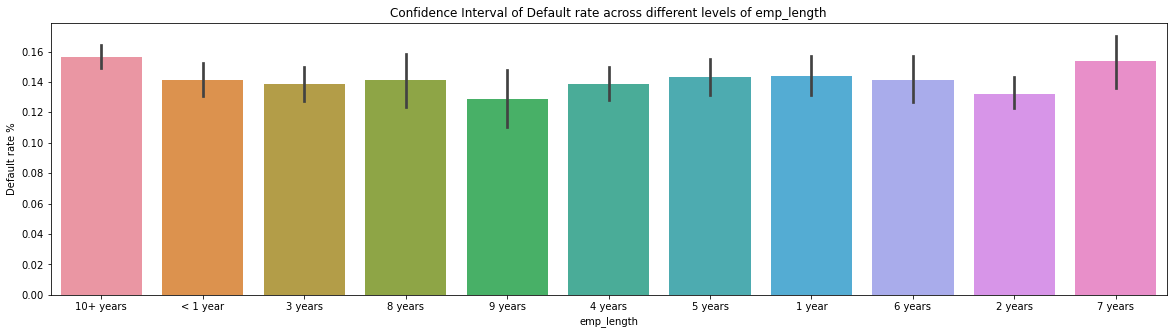

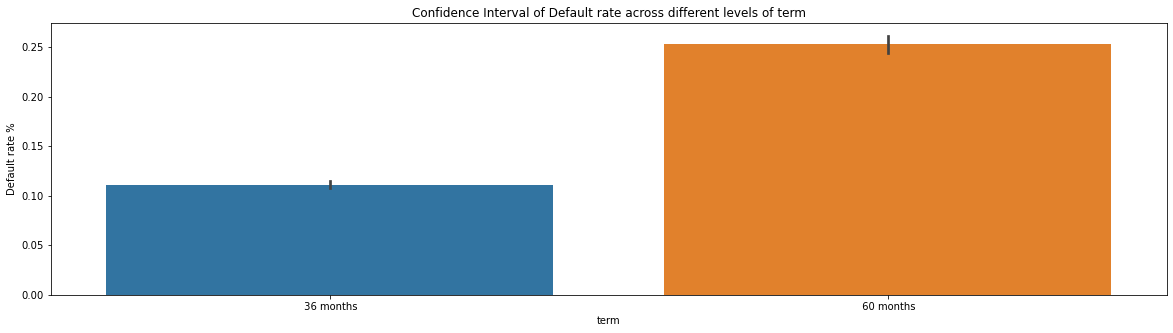

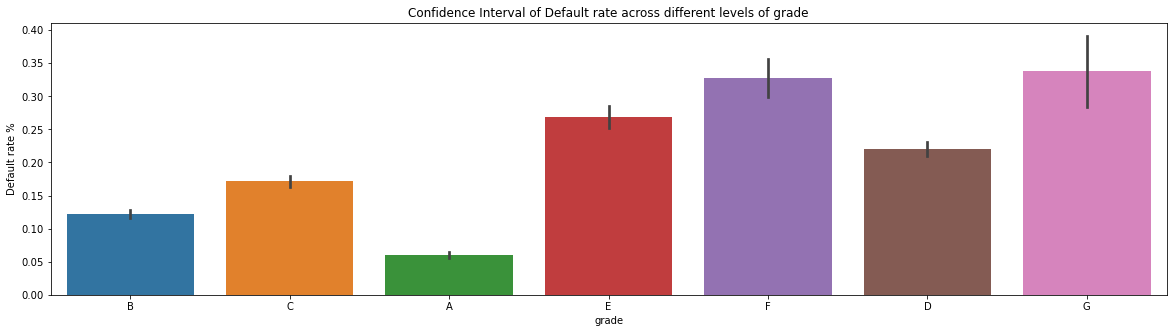

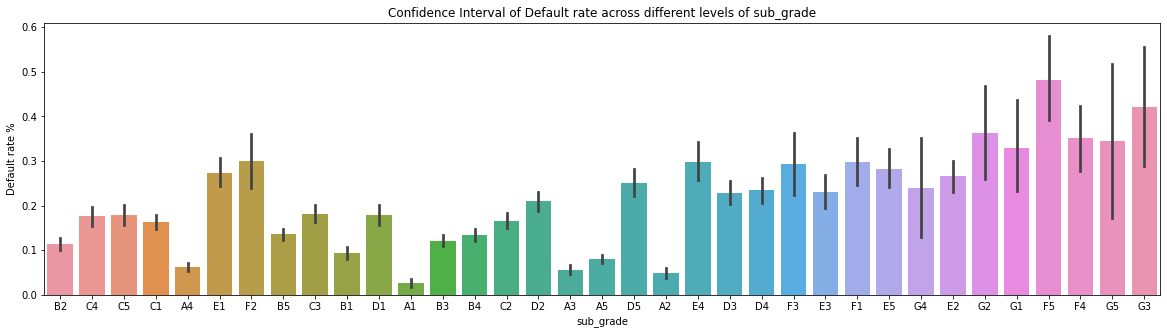

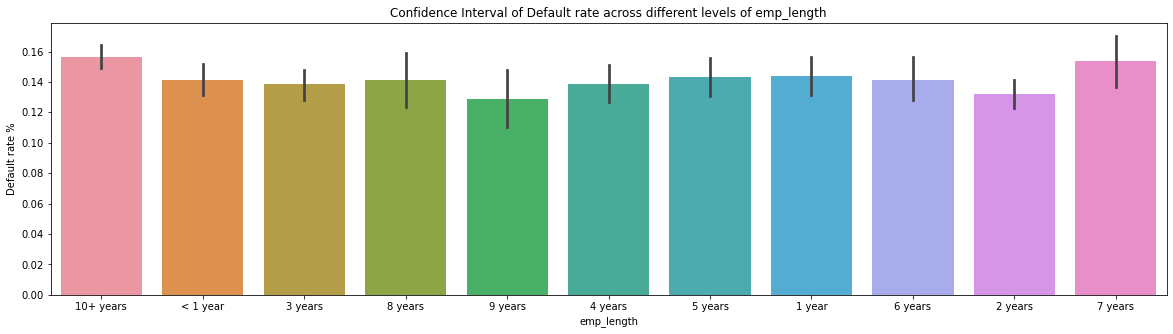

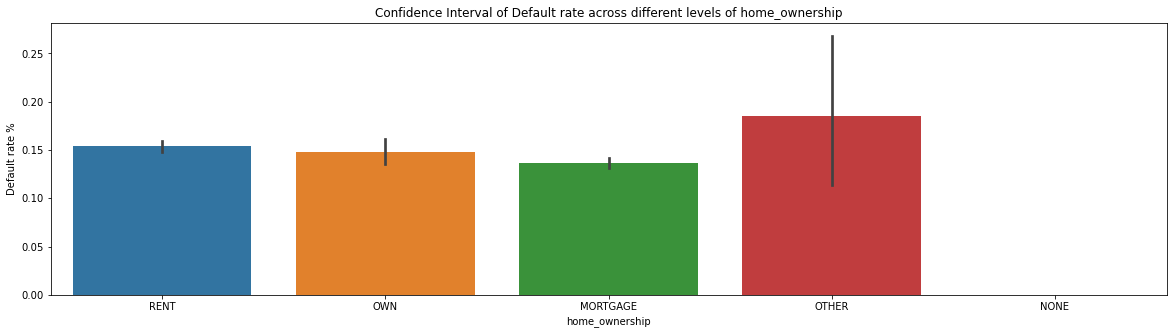

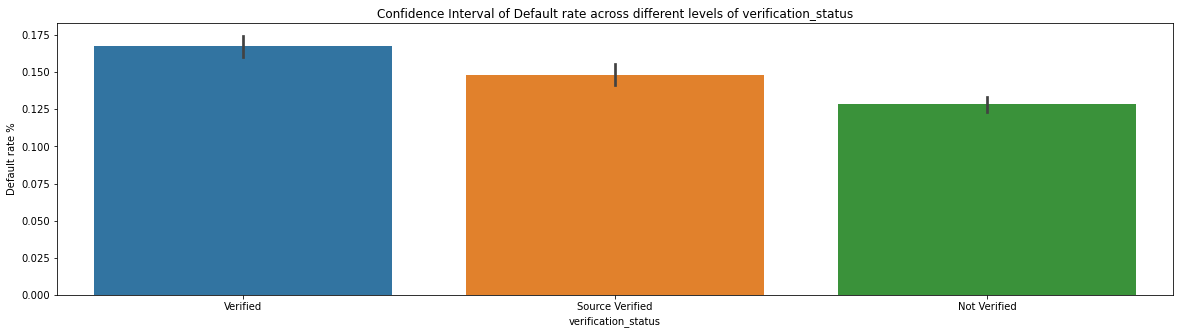

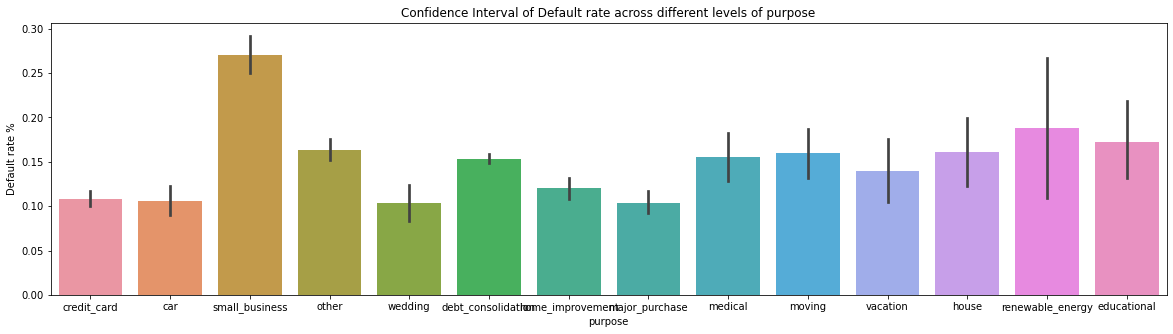

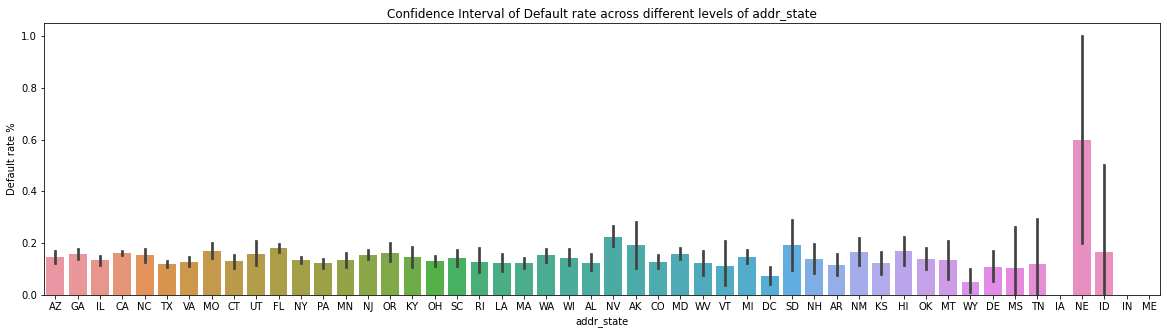

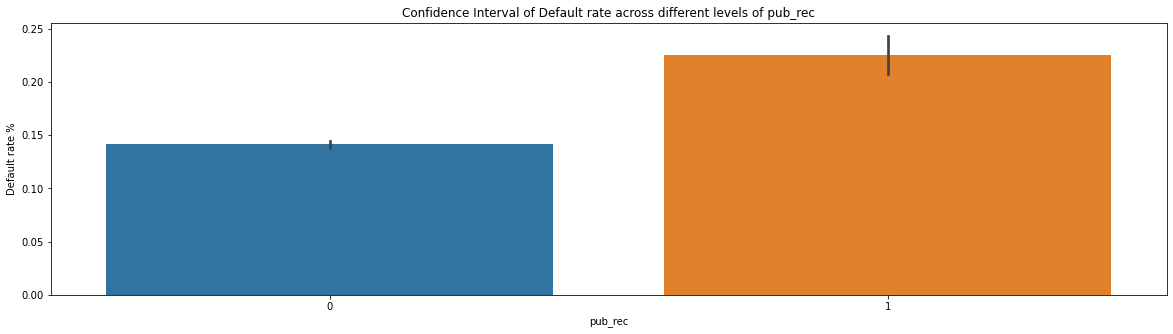

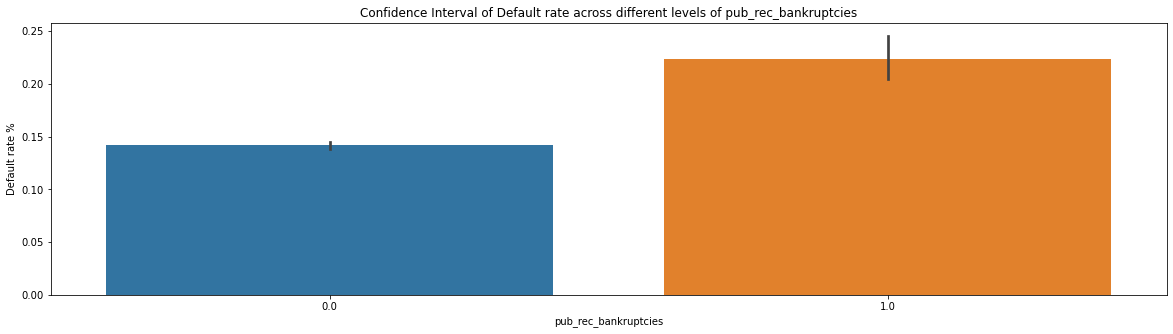

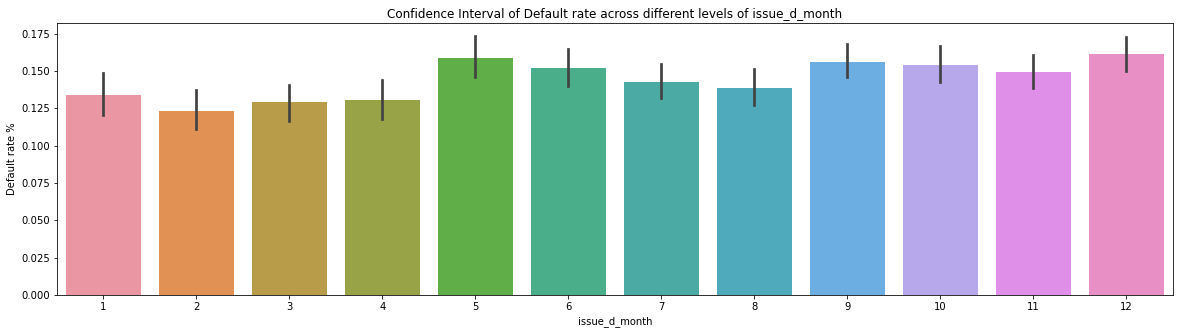

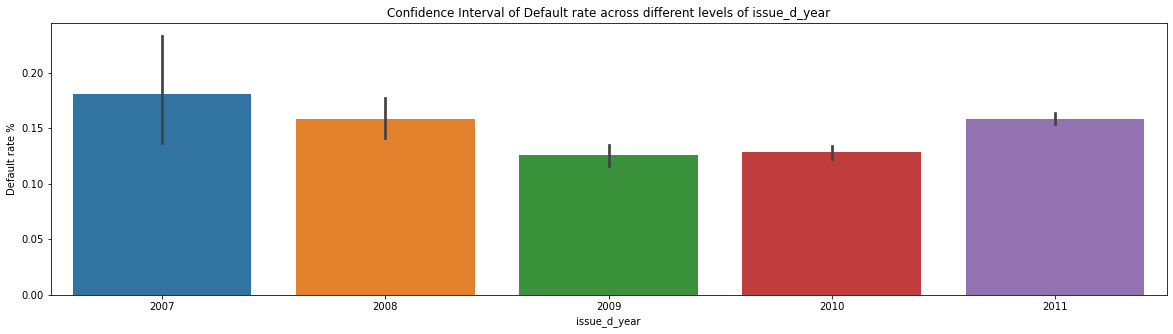

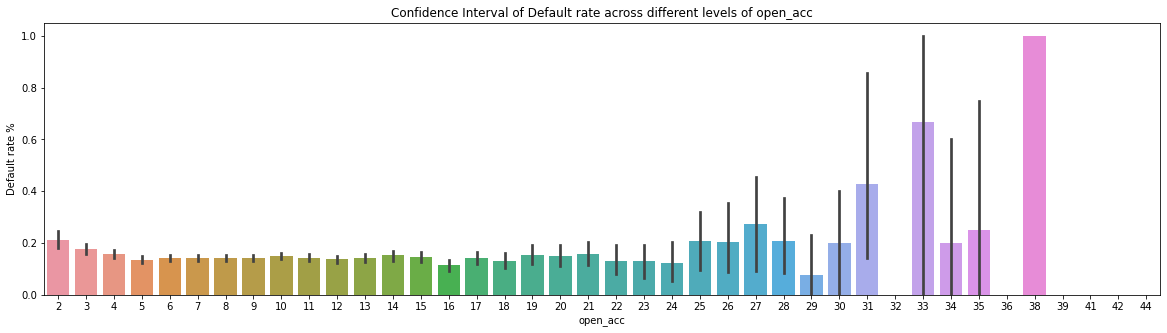

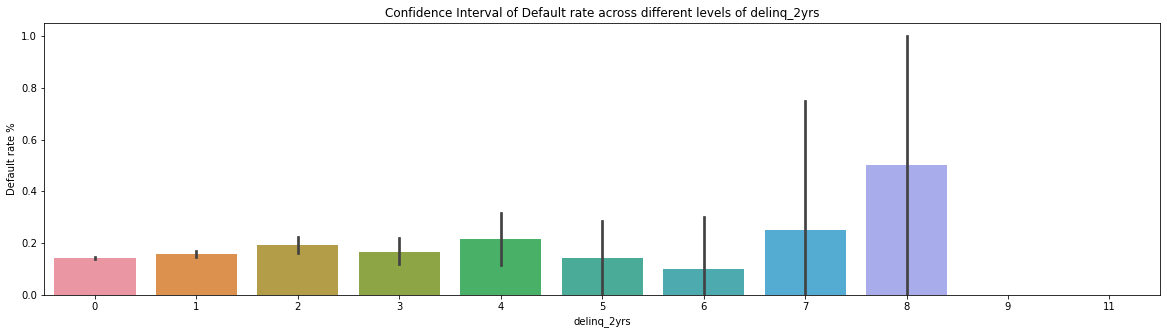

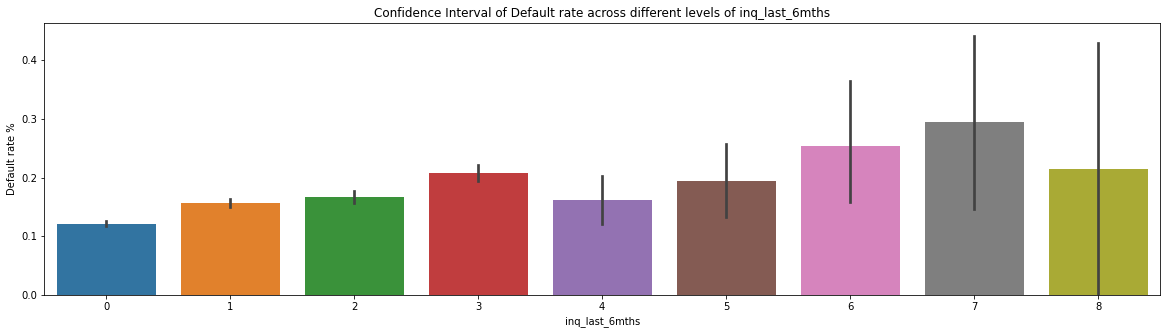

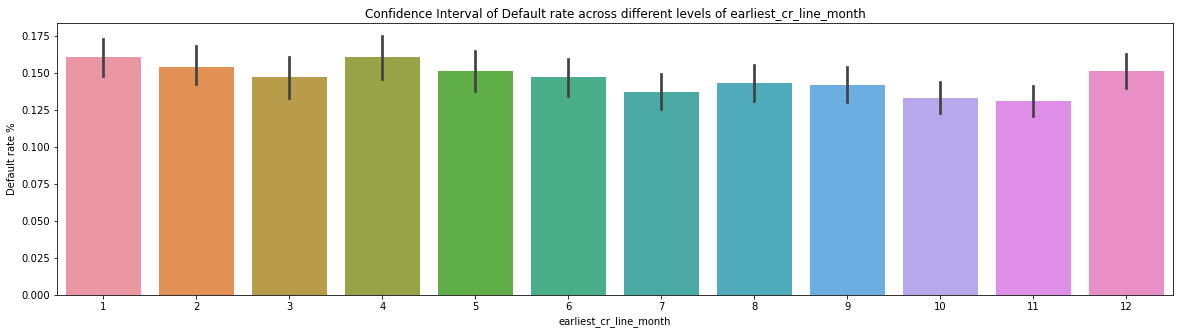

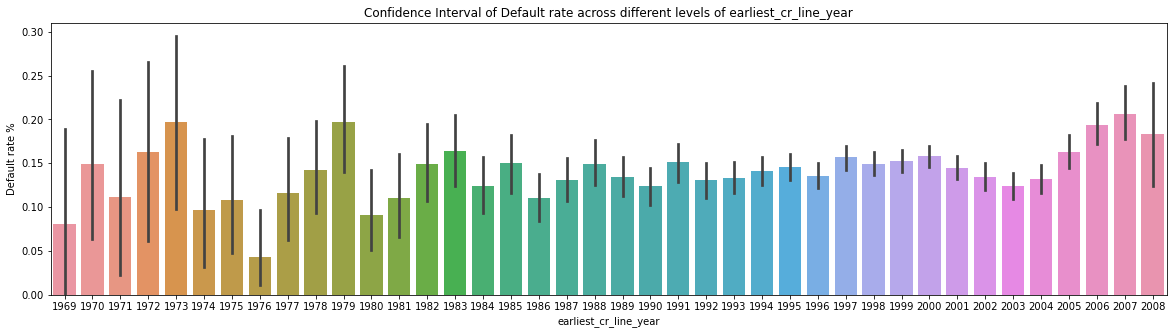

In [64]:
# Box plots for categorical variables

for x in categorical:
    plt.figure(figsize=(20,5))
    sns.barplot(x=df2[x], y=df2.default_rate)
    plt.title("Confidence Interval of Default rate across different levels of "+x)
    plt.ylabel("Default rate %")
    plt.xlabel(x)
    plt.show()

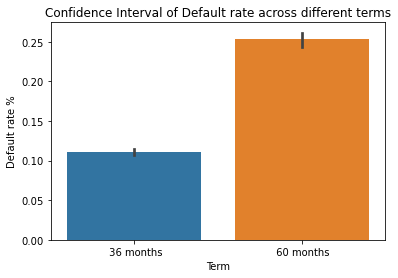

In [65]:
# plot for Term
sns.barplot(x=df2.term, y=df2.default_rate)
plt.title("Confidence Interval of Default rate across different terms")
plt.ylabel("Default rate %")
plt.xlabel("Term")
plt.show()

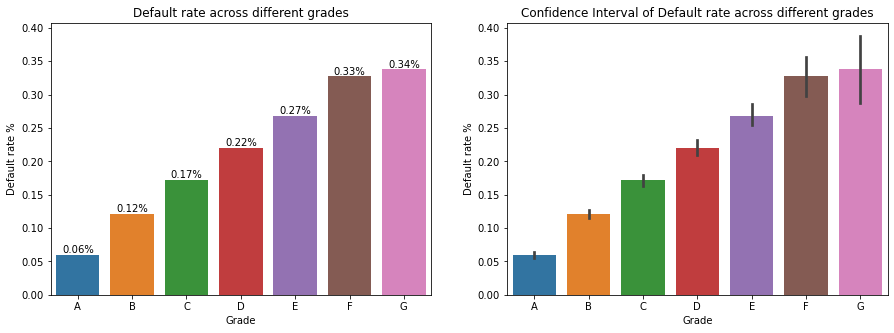

In [66]:
# plot for Grade
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5),sharey=True)

sort_grade = list(df2.grade.unique())
sort_grade.sort()

sns.barplot(ax=axes[0], x=df2.grade, y=df2.default_rate, ci=None, order=sort_grade)
axes[0].set_title("Default rate across different grades")
axes[0].set_ylabel("Default rate %")
axes[0].set_xlabel("Grade")
axes[0].bar_label(axes[0].containers[0], fmt='%.2f%%')


sns.barplot(ax=axes[1], x=df2.grade, y=df2.default_rate, order=sort_grade)
axes[1].set_title("Confidence Interval of Default rate across different grades")
axes[1].set_ylabel("Default rate %")
axes[1].set_xlabel("Grade")
axes[1].tick_params(labelleft=True)

plt.show()

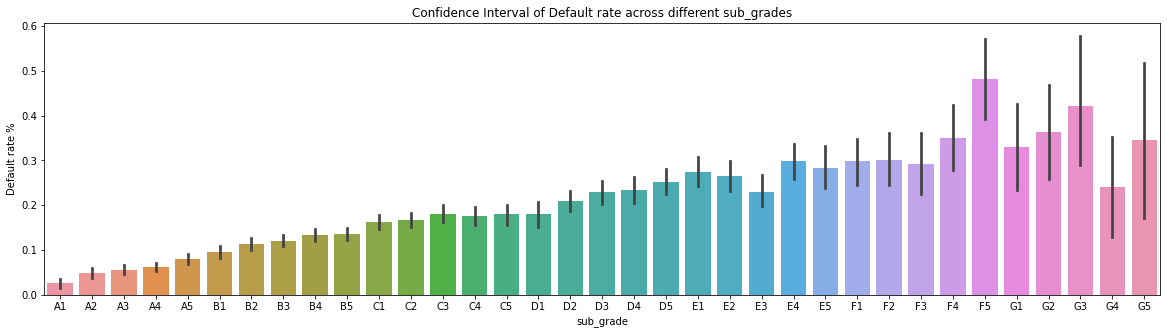

In [67]:
#plot for sub_grade
sort_sub_grade = list(df2.sub_grade.unique())
sort_sub_grade.sort()

plt.figure(figsize=(20,5))
sns.barplot(x=df2.sub_grade, y=df2.default_rate, order=sort_sub_grade)
plt.title("Confidence Interval of Default rate across different sub_grades")
plt.ylabel("Default rate %")
plt.xlabel("sub_grade")

plt.show()

In [68]:
# it can be see sub_grade column is a more granular level of grade column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pd.crosstab(df2.grade,df2.sub_grade))

sub_grade    A1    A2    A3    A4    A5    B1    B2    B3    B4    B5    C1  \
grade                                                                         
A          1124  1501  1804  2872  2711     0     0     0     0     0     0   
B             0     0     0     0     0  1792  1995  2820  2435  2609     0   
C             0     0     0     0     0     0     0     0     0     0  2052   
D             0     0     0     0     0     0     0     0     0     0     0   
E             0     0     0     0     0     0     0     0     0     0     0   
F             0     0     0     0     0     0     0     0     0     0     0   
G             0     0     0     0     0     0     0     0     0     0     0   

sub_grade    C2    C3    C4    C5   D1    D2    D3   D4   D5   E1   E2   E3  \
grade                                                                         
A             0     0     0     0    0     0     0    0    0    0    0    0   
B             0     0     0     0    0     0     0 

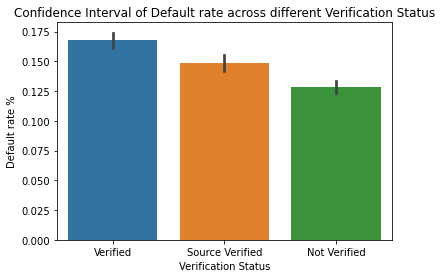

In [69]:
# plot for Verfication Status
sns.barplot(x=df2.verification_status, y=df2.default_rate)
plt.title("Confidence Interval of Default rate across different Verification Status")
plt.ylabel("Default rate %")
plt.xlabel("Verification Status")
plt.show()

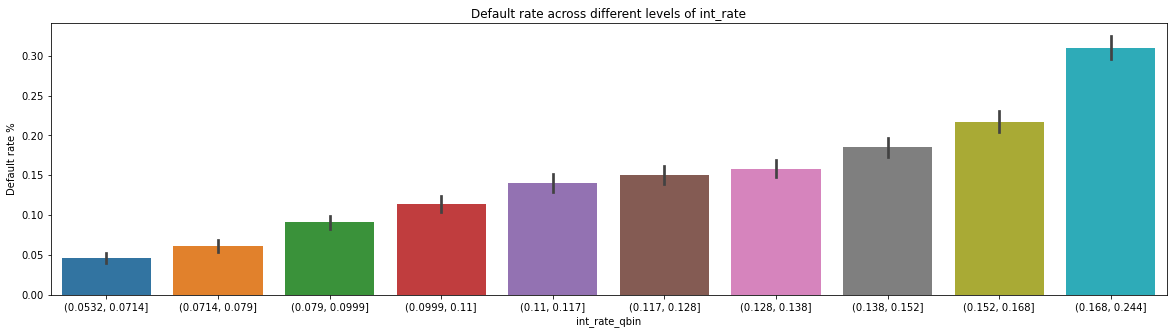

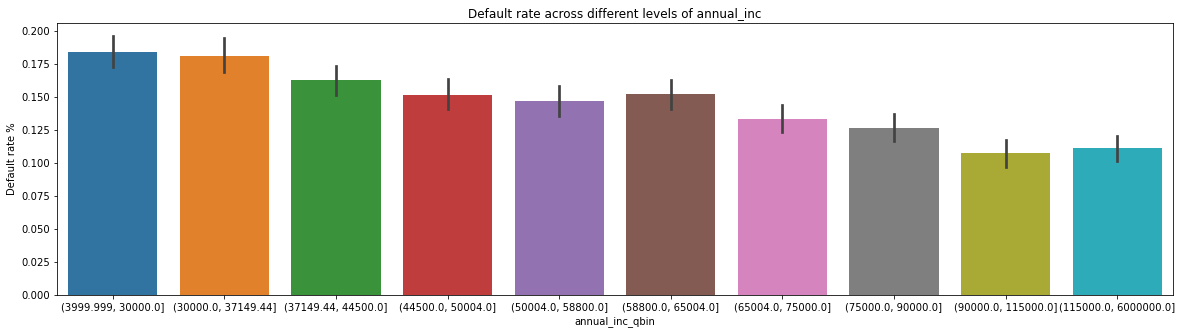

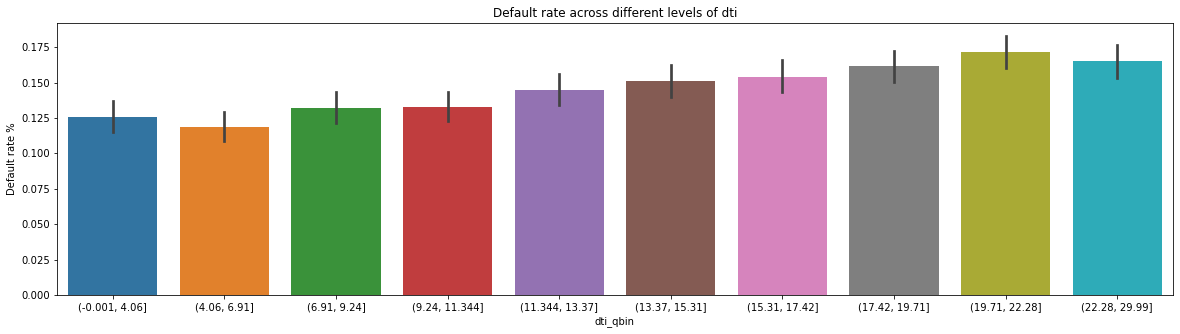

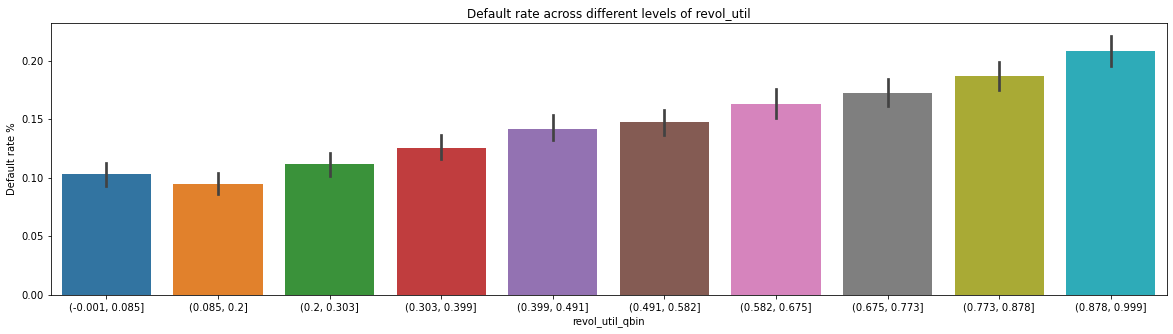

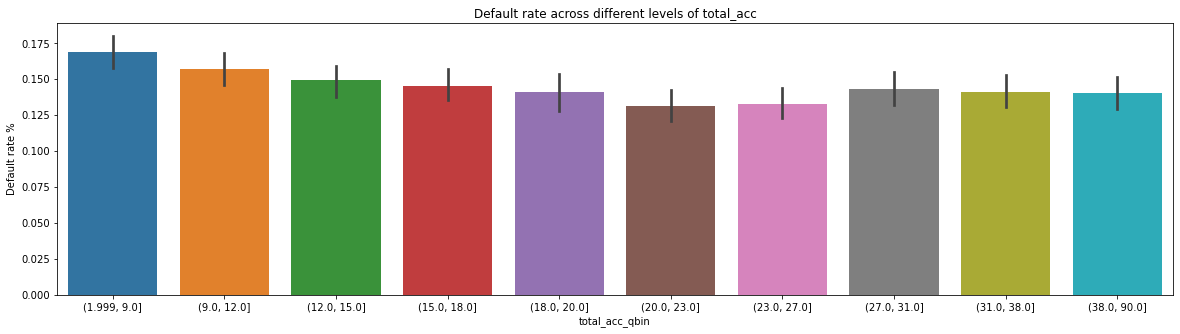

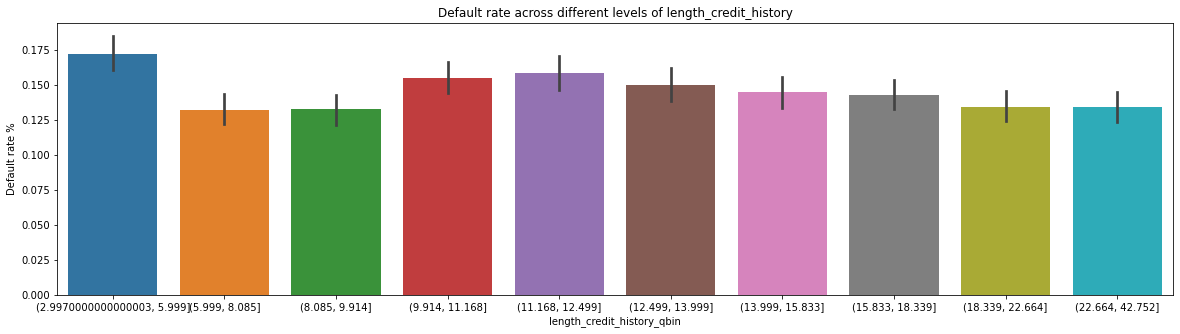

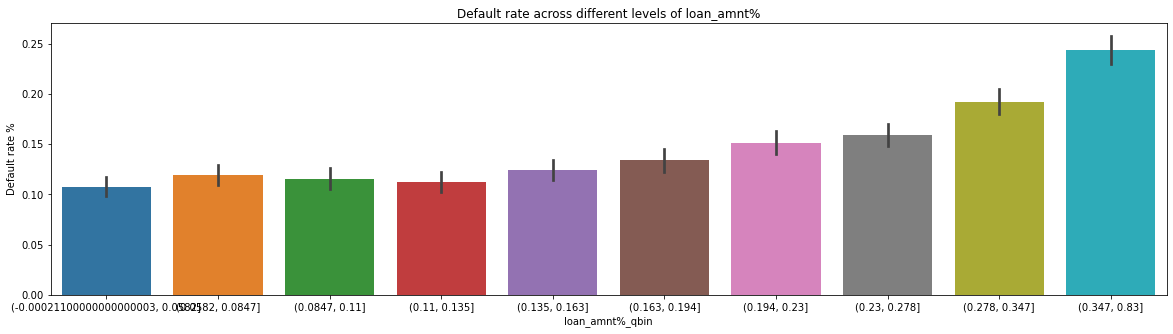

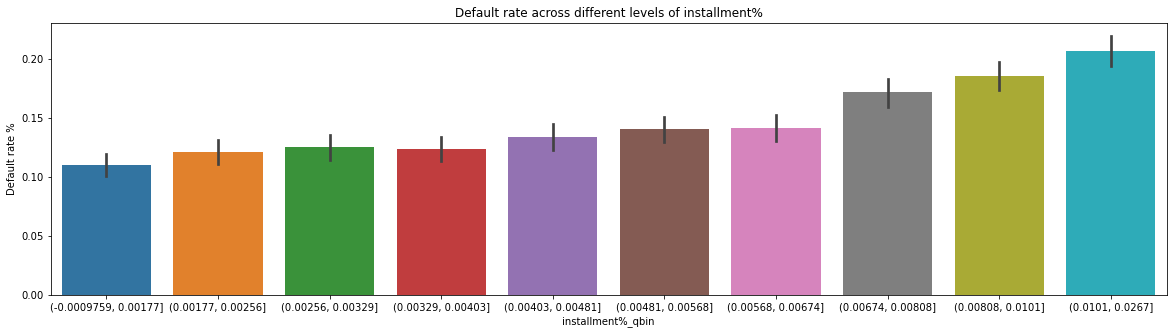

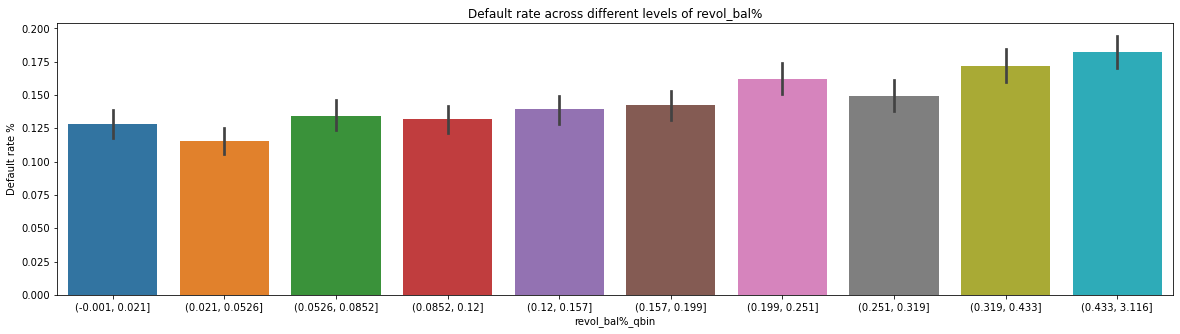

In [70]:
# bin some of the numeric variables based on quantiles into 10 buckets for further analysis
# this leads to each bin having roughly 10% of the population
# binning based on quantiles ensures each bin has sufficient records to make a meaningful and robust conclusion
# when binning linearly based on range some bins might not have sufficient rcords which can lead to spurious results

for x in numeric:
    df2[x+'_qbin'] = pd.qcut(df2[x], 10)
    plt.figure(figsize=(20,5))
    sns.barplot(x=df2[x+'_qbin'], y=df2.default_rate)
    plt.title("Default rate across different levels of "+x)
    plt.ylabel("Default rate %")
    plt.xlabel(x+'_qbin')
    plt.show()


In [71]:
# check default rate and percentage of loans across the 10 buckets
temp=pd.pivot_table(df2,
    index=["int_rate_qbin"],
    values=["default_rate","id"],
    aggfunc={"default_rate":'mean',"id":'size'})

temp["id"] = temp["id"].div(len(df2))
temp.rename(columns = {'id':'Total Loans %'}, inplace = True)
temp.sort_values(ascending=True,by=["default_rate","Total Loans %"],inplace=True)
print("\n")

output = temp.to_string(formatters={
"default_rate": '{:,.2%}'.format,
"Total Loans %": '{:,.2%}'.format
})
print(output)



                 default_rate Total Loans %
int_rate_qbin                              
(0.0532, 0.0714]        4.66%        10.81%
(0.0714, 0.079]         6.10%         9.93%
(0.079, 0.0999]         9.10%        10.51%
(0.0999, 0.11]         11.39%        11.04%
(0.11, 0.117]          14.09%         7.76%
(0.117, 0.128]         15.08%        10.23%
(0.128, 0.138]         15.84%        10.01%
(0.138, 0.152]         18.50%         9.80%
(0.152, 0.168]         21.69%        10.17%
(0.168, 0.244]         30.96%         9.73%


In [72]:
# look at default rates and loan counts across different categorical variable levels
for x in categorical:
    temp=pd.pivot_table(df2,
        index=[x],
        values=["default_rate","id"],
        aggfunc={"default_rate":'mean',"id":'size'})
    
    temp["id"] = temp["id"].div(len(df2))
    temp.rename(columns = {'id':'Total Loans %'}, inplace = True)
    temp.sort_values(ascending=True,by=["default_rate","Total Loans %"],inplace=True)
    print("\n")
    
    output = temp.to_string(formatters={
    "default_rate": '{:,.2%}'.format,
    "Total Loans %": '{:,.0%}'.format
    })
    print(output)
    



           default_rate Total Loans %
emp_length                           
9 years          12.90%            3%
2 years          13.21%           11%
3 years          13.84%           10%
4 years          13.84%            9%
6 years          14.15%            6%
< 1 year         14.15%           12%
8 years          14.16%            4%
5 years          14.33%            8%
1 year           14.40%            8%
7 years          15.38%            4%
10+ years        15.67%           22%


           default_rate Total Loans %
term                                 
 36 months       11.09%           75%
 60 months       25.29%           25%


      default_rate Total Loans %
grade                           
A            5.98%           26%
B           12.17%           30%
C           17.19%           20%
D           21.98%           13%
E           26.86%            7%
F           32.72%            3%
G           33.78%            1%


          default_rate Total Loans %
sub_grade   

# Bivariate Analysis

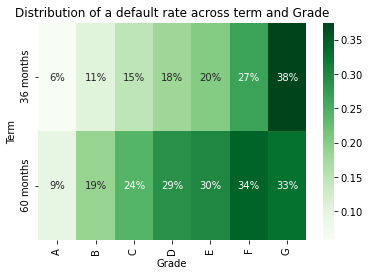

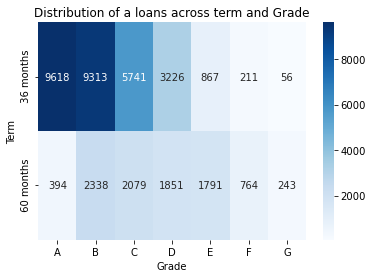

In [73]:
# see thedistribution of default rate across term and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["term"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")
# print(temp.shape)
# print(temp)
#plt.figure(figsize=(7,5))
ax=sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
ax.set_title("Distribution of a default rate across term and Grade")
ax.set_ylabel("Term")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

# see thedistribution of loans across term and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["term"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="size")
# print(temp.shape)
# print(temp)
#plt.figure(figsize=(7,5))
ax=sns.heatmap(temp,cmap="Blues",annot=True,fmt=".0f")
ax.set_title("Distribution of a loans across term and Grade")
ax.set_ylabel("Term")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

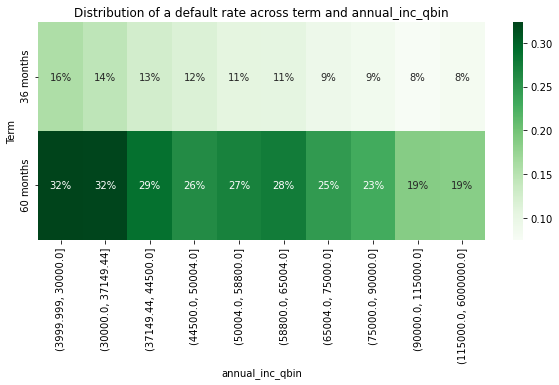

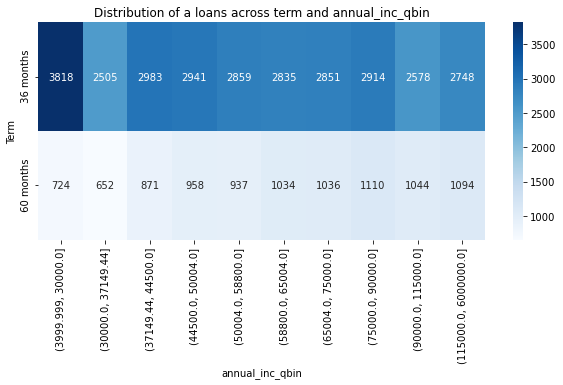

In [74]:
# see thedistribution of default rate across term and annual_inc_qbin variables
sort_annual_inc_qbin = list(df2.annual_inc_qbin.unique())
sort_annual_inc_qbin.sort()

temp=pd.pivot_table(df2,
    index=["term"],
    columns= ["annual_inc_qbin"],               
    values=["default_rate"],
    aggfunc="mean")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,4))
ax=sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
ax.set_title("Distribution of a default rate across term and annual_inc_qbin")
ax.set_ylabel("Term")
ax.set_xlabel("annual_inc_qbin")
ax.set_xticklabels(sort_annual_inc_qbin)
plt.show()

# see thedistribution of loans across term and annual_inc_qbin variables
sort_annual_inc_qbin = list(df2.annual_inc_qbin.unique())
sort_annual_inc_qbin.sort()

temp=pd.pivot_table(df2,
    index=["term"],
    columns= ["annual_inc_qbin"],               
    values=["default_rate"],
    aggfunc="size")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,4))
ax=sns.heatmap(temp,cmap="Blues",annot=True,fmt=".0f")
ax.set_title("Distribution of a loans across term and annual_inc_qbin")
ax.set_ylabel("Term")
ax.set_xlabel("annual_inc_qbin")
ax.set_xticklabels(sort_annual_inc_qbin)
plt.show()

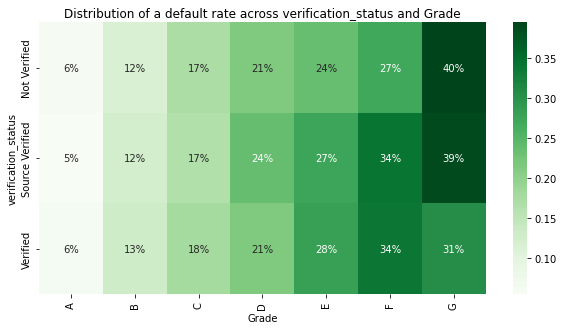

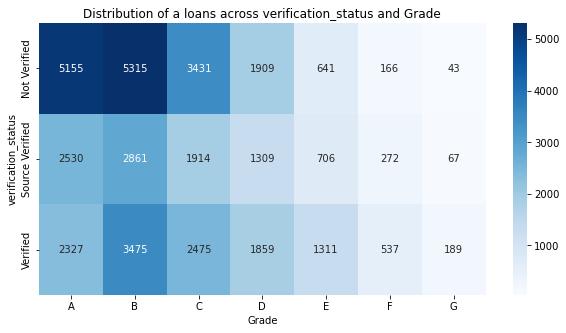

In [75]:
# see thedistribution of default rate across verification_status and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["verification_status"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,5))
ax=sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
ax.set_title("Distribution of a default rate across verification_status and Grade")
ax.set_ylabel("verification_status")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

# see thedistribution of default rate across verification_status and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["verification_status"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="size")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,5))
ax=sns.heatmap(temp,cmap="Blues",annot=True,fmt=".0f")
ax.set_title("Distribution of a loans across verification_status and Grade")
ax.set_ylabel("verification_status")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

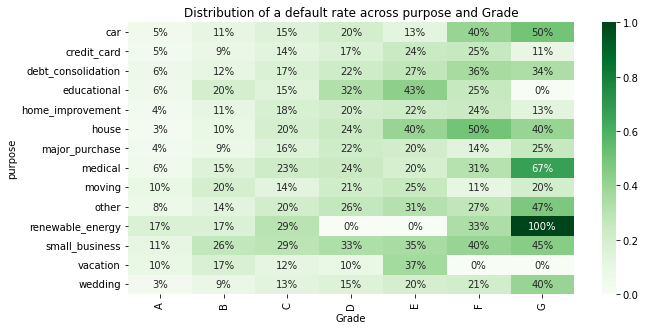

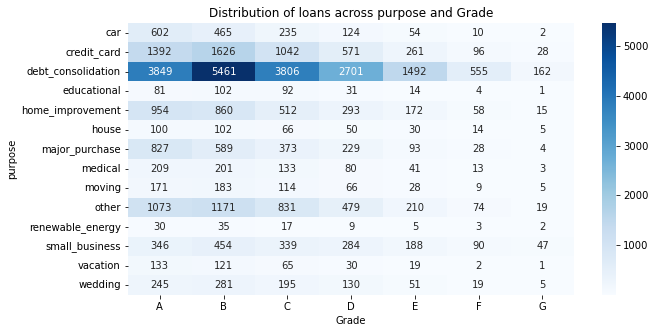

In [76]:
# see thedistribution of default rate across purpose and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["purpose"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,5))
ax=sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
ax.set_title("Distribution of a default rate across purpose and Grade")
ax.set_ylabel("purpose")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

# see thedistribution of loans across purpose and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["purpose"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="size")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,5))
ax=sns.heatmap(temp,cmap="Blues",annot=True,fmt=".0f")
ax.set_title("Distribution of loans across purpose and Grade")
ax.set_ylabel("purpose")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

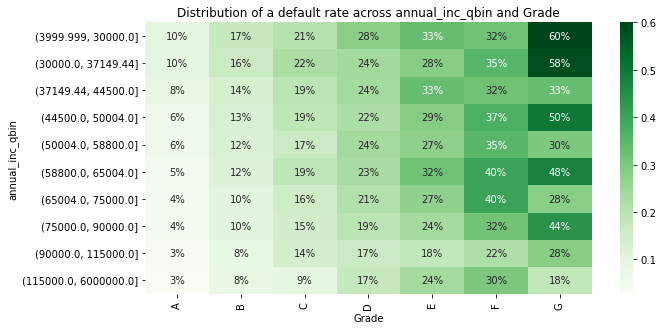

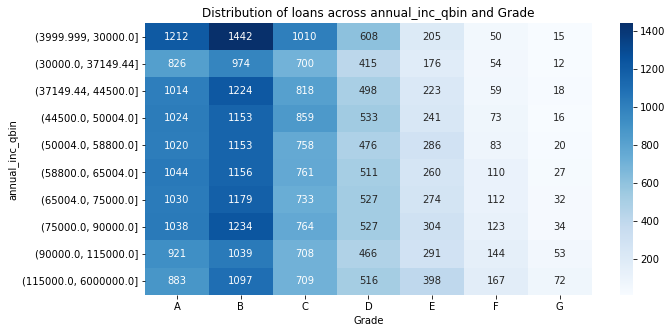

In [77]:
# see thedistribution of default rate across annual_inc_qbin and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["annual_inc_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,5))
ax=sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
ax.set_title("Distribution of a default rate across annual_inc_qbin and Grade")
ax.set_ylabel("annual_inc_qbin")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

# see thedistribution of loans across annual_inc_qbin and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["annual_inc_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="size")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,5))
ax=sns.heatmap(temp,cmap="Blues",annot=True,fmt=".0f")
ax.set_title("Distribution of loans across annual_inc_qbin and Grade")
ax.set_ylabel("annual_inc_qbin")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

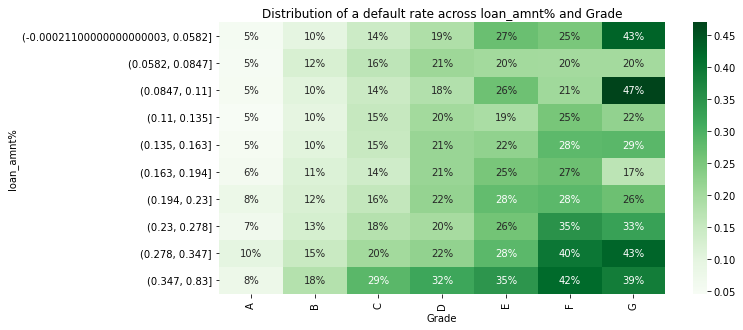

In [78]:
# see thedistribution of default rate across loan_amnt% and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["loan_amnt%_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,5))
ax=sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
ax.set_title("Distribution of a default rate across loan_amnt% and Grade")
ax.set_ylabel("loan_amnt%")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

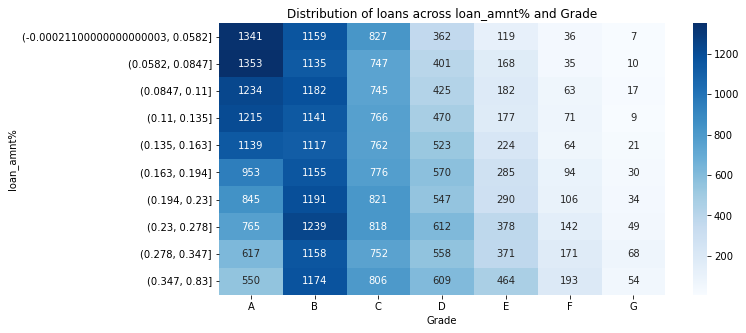

In [79]:
# see thedistribution of loans across loan_amnt% and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["loan_amnt%_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="size")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(10,5))
ax=sns.heatmap(temp,cmap="Blues",annot=True,fmt=".0f")
ax.set_title("Distribution of loans across loan_amnt% and Grade")
ax.set_ylabel("loan_amnt%")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

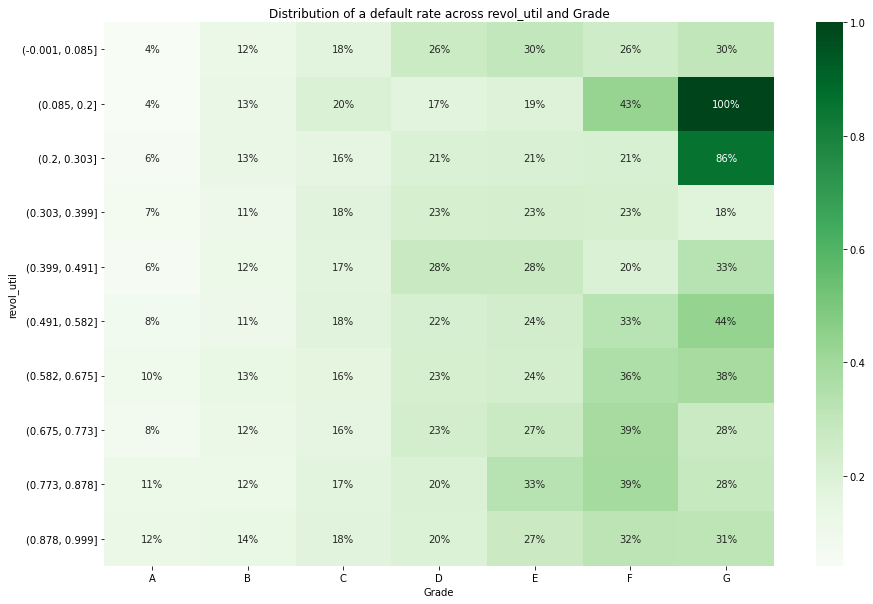

In [80]:
# see thedistribution of default rate across revol_util and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["revol_util_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(15,10))
ax=sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
ax.set_title("Distribution of a default rate across revol_util and Grade")
ax.set_ylabel("revol_util")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

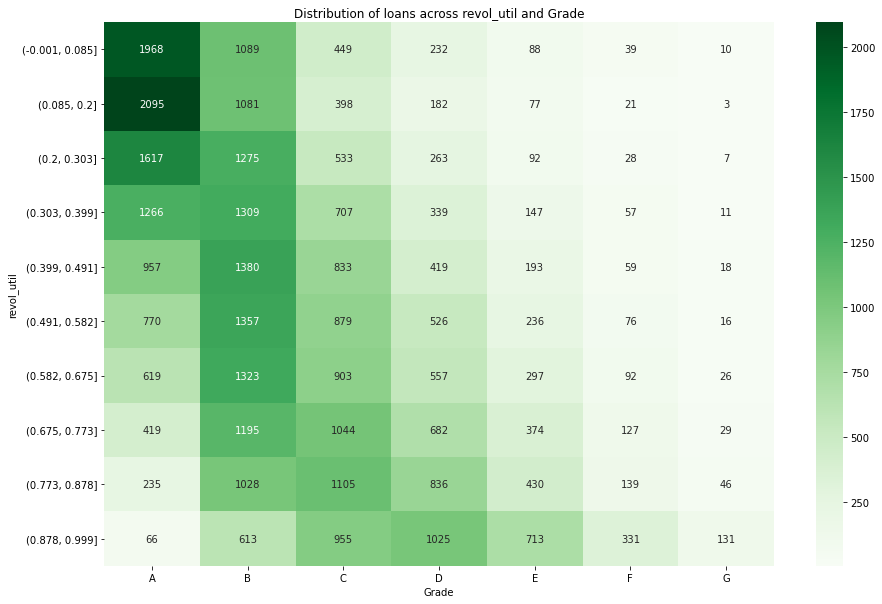

In [81]:
# see thedistribution of loans across revol_util and Grade variables
sort_grade = list(df2.grade.unique())
sort_grade.sort()

temp=pd.pivot_table(df2,
    index=["revol_util_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="size")
# print(temp.shape)
# print(temp)
plt.figure(figsize=(15,10))
ax=sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0f")
ax.set_title("Distribution of loans across revol_util and Grade")
ax.set_ylabel("revol_util")
ax.set_xlabel("Grade")
ax.set_xticklabels(sort_grade)
plt.show()

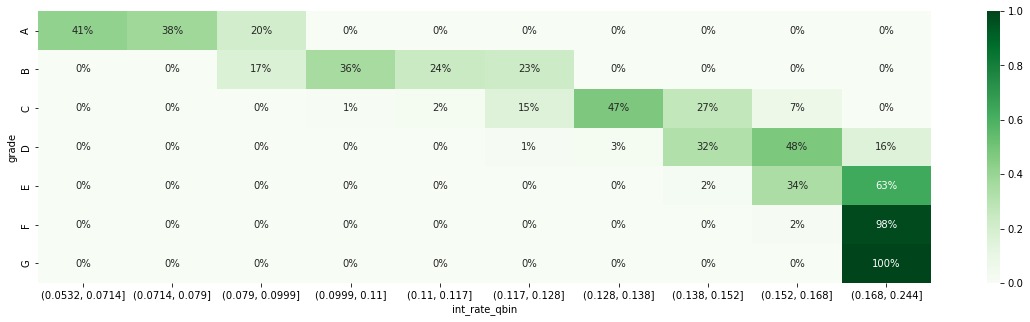

In [82]:
# look at distribution of loans across grade and interest rate bins
res = pd.crosstab(df2.grade,df2.int_rate_qbin,normalize='index')
plt.figure(figsize=(20,5))
sns.heatmap(res,cmap="Greens",annot=True,fmt=".0%")
plt.show()

In [83]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (0.0532, 0.0714]  7 non-null      float64
 1   (0.0714, 0.079]   7 non-null      float64
 2   (0.079, 0.0999]   7 non-null      float64
 3   (0.0999, 0.11]    7 non-null      float64
 4   (0.11, 0.117]     7 non-null      float64
 5   (0.117, 0.128]    7 non-null      float64
 6   (0.128, 0.138]    7 non-null      float64
 7   (0.138, 0.152]    7 non-null      float64
 8   (0.152, 0.168]    7 non-null      float64
 9   (0.168, 0.244]    7 non-null      float64
dtypes: float64(10)
memory usage: 616.0+ bytes


In [84]:
temp=pd.pivot_table(df2,
    index=["delinq_2yrs"],
    values=["default_rate","id"],
    aggfunc={"default_rate":'mean',"id":'size'})

temp["id"] = temp["id"].div(len(df2))
temp.rename(columns = {'id':'Total Loans %'}, inplace = True)
temp.sort_values(ascending=True,by=["default_rate","Total Loans %"],inplace=True)
print("\n")

output = temp.to_string(formatters={
"default_rate": '{:,.2%}'.format,
"Total Loans %": '{:,.2%}'.format
})
print(output)



            default_rate Total Loans %
delinq_2yrs                           
9                  0.00%         0.00%
11                 0.00%         0.00%
6                 10.00%         0.03%
5                 14.29%         0.05%
0                 14.34%        89.12%
1                 15.82%         8.33%
3                 16.59%         0.55%
2                 19.35%         1.75%
4                 21.67%         0.16%
7                 25.00%         0.01%
8                 50.00%         0.01%


<AxesSubplot:xlabel='None-grade', ylabel='total_acc_qbin'>

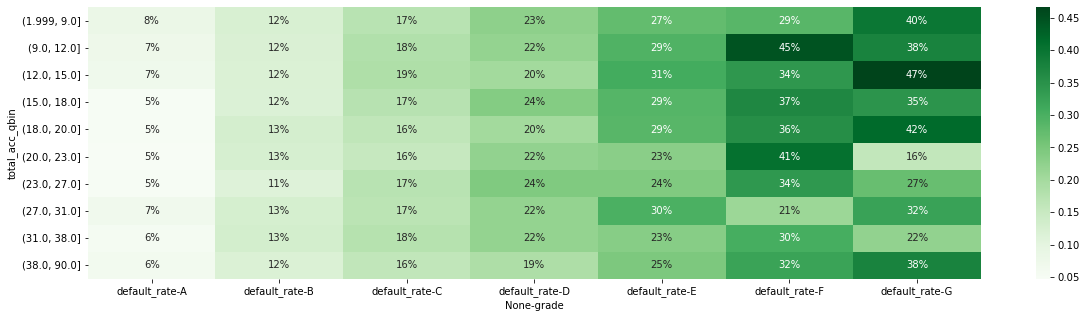

In [85]:
temp=pd.pivot_table(df2,
    index=["total_acc_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")

plt.figure(figsize=(20,5))
sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")

<AxesSubplot:xlabel='None-grade', ylabel='verification_status'>

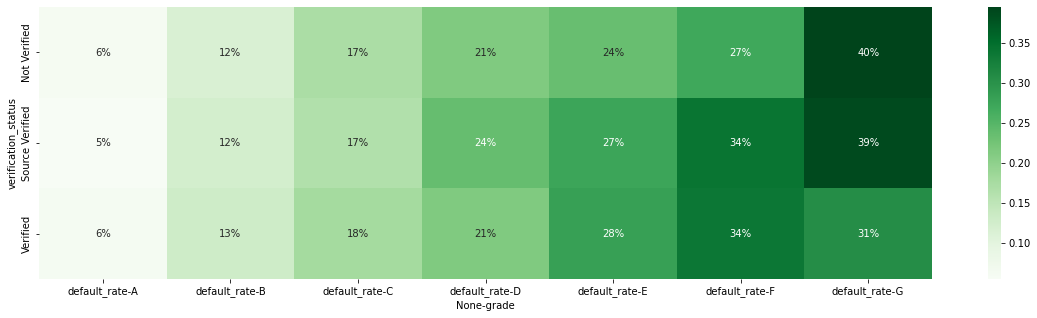

In [86]:
temp=pd.pivot_table(df2,
    index=["verification_status"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")

plt.figure(figsize=(20,5))
sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")

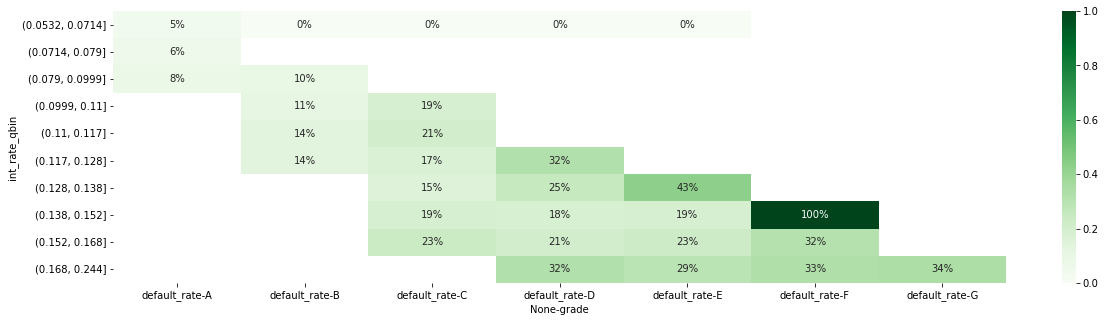

In [87]:
temp=pd.pivot_table(df2,
    index=["int_rate_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")

plt.figure(figsize=(20,5))
sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
plt.show()

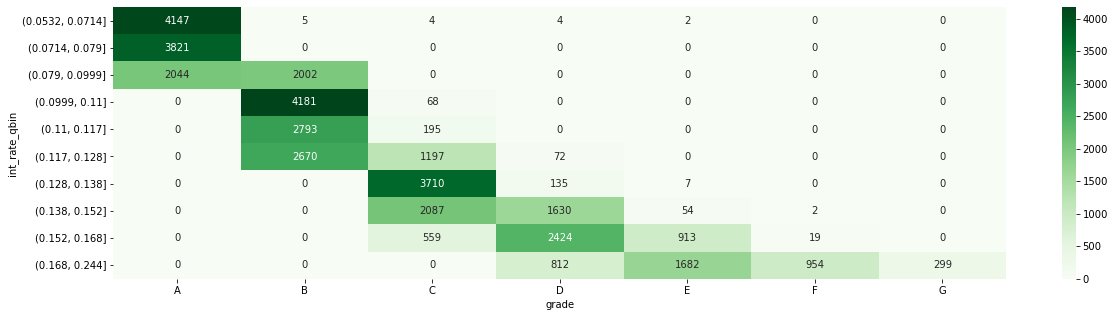

In [88]:
temp=pd.pivot_table(df2,
    index=["int_rate_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="size")

plt.figure(figsize=(20,5))
sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0f")
plt.show()

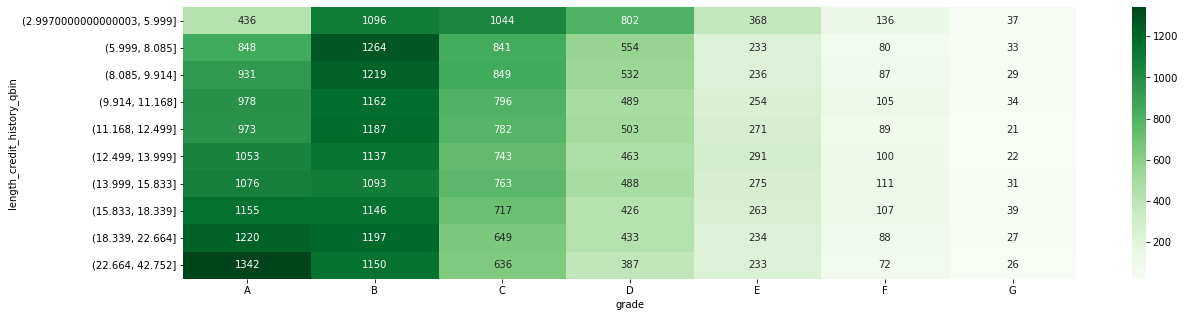

In [89]:
temp=pd.pivot_table(df2,
    index=["length_credit_history_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="size")

plt.figure(figsize=(20,5))
sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0f")
plt.show()

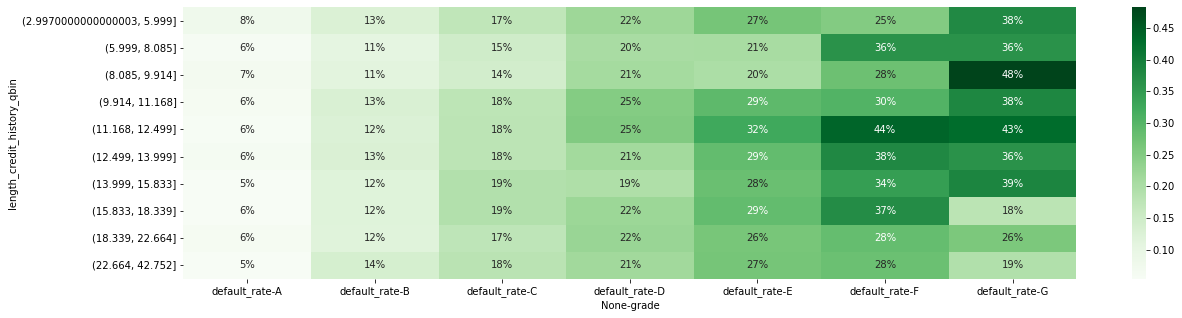

In [90]:
temp=pd.pivot_table(df2,
    index=["length_credit_history_qbin"],
    columns= ["grade"],               
    values=["default_rate"],
    aggfunc="mean")

plt.figure(figsize=(20,5))
sns.heatmap(temp,cmap="Greens",annot=True,fmt=".0%")
plt.show()

# Recommendations

While lending the Bank should pay special attention to the following variables

1. Term – Lower Terms have lower default rate then Higher Term loans
2. Grade – Defaults are lowest for Grade A and increase for each Grade upto G. Sub Grades provide some further granularity for better grades but loose discriminatory power for worse grades
3. Annual Income – Defaults are generally lower for people with higher income
4. Revolver Utilization – this is a good indicator of default rate with lower revolver utilization signifying lower credit risk and vice versa. Default rate for high utilization loans is almost double that of lower utilization loans. 
5. Purpose – Loans for Wedding purpose are generally better than loans for Small Business which have a much higher default rate.
6. Loan Amount and Installment as a proportion of Annual Income - default rates are low when Loan Amount and Installment are a smaller fraction of Annual Income and vice versa.
7. An interesting thing to note is that 5 year term loans are not as risky for high income borrowers. 
8. Verification Status and DTI show unintuitive results, the company can try and explore the underlying reasons for this
